In [2]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-
# @Time    : 2018/3/23 10:13
# @Author  : WeiXiang
# @Site    : 
# @File    : test_torch.py
# @Software: PyCharm
import torch
import numpy as np

np_data = np.arange(10).reshape((2,5))
torch_data = torch.from_numpy(np_data)
tensor2array = torch_data.numpy()

print(
    '\nnumpy array:', np_data,          # [[0 1 2], [3 4 5]]
    '\ntorch tensor:', torch_data,      #  0  1  2 \n 3  4  5    [torch.LongTensor of size 2x3]
    '\ntensor to array:', tensor2array, # [[0 1 2], [3 4 5]]
)



numpy array: [[0 1 2 3 4]
 [5 6 7 8 9]] 
torch tensor: 
 0  1  2  3  4
 5  6  7  8  9
[torch.IntTensor of size 2x5]
 
tensor to array: [[0 1 2 3 4]
 [5 6 7 8 9]]


In [3]:
# matrix multiplication 矩阵点乘
data = [[1,2], [3,4]]
tensor = torch.FloatTensor(data)  # 转换成32位浮点 tensor
# correct method
print(
    '\nmatrix multiplication (matmul)',
    '\nnumpy: ', np.matmul(data, data),     # [[7, 10], [15, 22]]
    '\ntorch: ', torch.mm(tensor, tensor)   # [[7, 10], [15, 22]]
)

# !!!!  下面是错误的方法 !!!!
data = np.array(data)
print(
    '\nmatrix multiplication (dot)',
    '\nnumpy: ', data.dot(data),        # [[7, 10], [15, 22]] 在numpy 中可行
    '\ntorch: ', tensor.dot(tensor)     # torch 会转换成 [1,2,3,4].dot([1,2,3,4) = 30.0
)


matrix multiplication (matmul) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  
  7  10
 15  22
[torch.FloatTensor of size 2x2]


matrix multiplication (dot) 
numpy:  [[ 7 10]
 [15 22]] 
torch:  30.0


In [4]:
# Variable 简介
from torch.autograd import Variable
'''
在 Torch 中的 Variable 就是一个存放会变化的值的地理位置. 里面的值会不停的变化. 就像一个裝鸡蛋的篮子, 鸡蛋数会不停变动. 那谁是里面的鸡蛋呢, 
自然就是 Torch 的 Tensor 咯. 如果用一个 Variable 进行计算, 那返回的也是一个同类型的 Variable.
'''
# 先生鸡蛋
tensor = torch.FloatTensor([[1,2],[3,4]])
# 把鸡蛋放到篮子里, requires_grad是参不参与误差反向传播, 要不要计算梯度
variable = Variable(tensor, requires_grad=True)

print(tensor) 
print(variable)
v = variable*variable
print()
print(v)


 1  2
 3  4
[torch.FloatTensor of size 2x2]

Variable containing:
 1  2
 3  4
[torch.FloatTensor of size 2x2]


Variable containing:
  1   4
  9  16
[torch.FloatTensor of size 2x2]



In [5]:
t_out = torch.mean(tensor*tensor)       # x^2
v_out = torch.mean(variable*variable)   # x^2
print(t_out)
print(v_out)    # 7.5

7.5
Variable containing:
 7.5000
[torch.FloatTensor of size 1]



In [6]:
v_out.backward()    # 模拟 v_out 的误差反向传递

# 下面两步看不懂没关系, 只要知道 Variable 是计算图的一部分, 可以用来传递误差就好.
# v_out = 1/4 * sum(variable*variable) 这是计算图中的 v_out 计算步骤
# 针对于 v_out 的梯度就是, d(v_out)/d(variable) = 1/4*2*variable = variable/2

print(variable.grad)    # 初始 Variable 的梯度

Variable containing:
 0.5000  1.0000
 1.5000  2.0000
[torch.FloatTensor of size 2x2]



In [7]:
vout = torch.sum(variable*variable)
vout.backward()
print(variable.grad)

Variable containing:
  2.5000   5.0000
  7.5000  10.0000
[torch.FloatTensor of size 2x2]



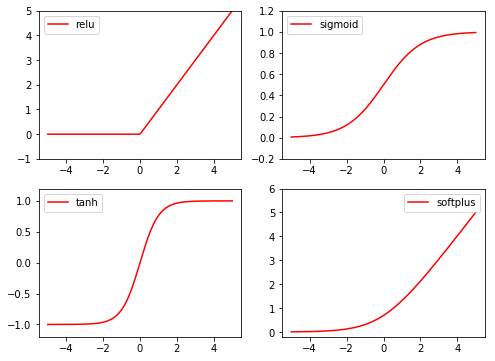

In [8]:
import torch.nn.functional as F
import matplotlib.pyplot as plt
x = torch.linspace(-5,5,200)
x = Variable(x)
x_np = x.data.numpy()# 换成 numpy array, 出图时用
y_relu = F.relu(x).data.numpy()
y_sig = F.sigmoid(x).data.numpy()
y_tanh = F.tanh(x).data.numpy()
y_softplus = F.softplus(x).data.numpy()

plt.figure(1, figsize=(8, 6))
plt.subplot(221)
plt.plot(x_np, y_relu, c='red', label='relu')
plt.ylim((-1, 5))
plt.legend(loc='best')

plt.subplot(222)
plt.plot(x_np, y_sig, c='red', label='sigmoid')
plt.ylim((-0.2, 1.2))
plt.legend(loc='best')

plt.subplot(223)
plt.plot(x_np, y_tanh, c='red', label='tanh')
plt.ylim((-1.2, 1.2))
plt.legend(loc='best')

plt.subplot(224)
plt.plot(x_np, y_softplus, c='red', label='softplus')
plt.ylim((-0.2, 6))
plt.legend(loc='best')

plt.show()



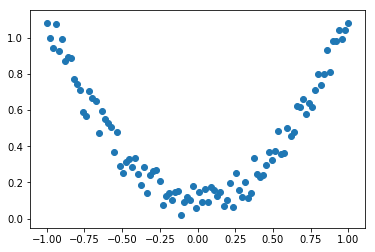

In [ ]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

# torch.manual_seed(1)    # reproducible
xa = np.linspace(-1,1,100,dtype=np.float32).reshape(100,1)
print(xa.shape)
x = torch.from_numpy(xa)
# x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1)  # x data (tensor), shape=(100, 1)
y = x.pow(2) + 0.2*torch.rand(x.size())                 # noisy y data (tensor), shape=(100, 1)

# torch can only train on Variable, so convert them to Variable
x, y = Variable(x), Variable(y)

# plt.scatter(x.data.numpy(), y.data.numpy())
# plt.show()


class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

net = Net(n_feature=1, n_hidden=10, n_output=1)     # define the network
print(net)  # net architecture

optimizer = torch.optim.SGD(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss()  # this is for regression mean squared loss

plt.ion()   # something about plotting

for t in range(100):
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients

    if t % 5 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data[0], fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

plt.ioff()
plt.show()

In [1]:
import torch
from torch import nn, optim
import torch.nn.functional as F
from torch.autograd import Variable
from torch.utils.data import DataLoader
from torchvision import transforms
from torchvision import datasets
import time
# 定义超参数
batch_size = 32
learning_rate = 1e-3
num_epoches = 100

# 下载训练集 MNIST 手写数字训练集
train_dataset = datasets.MNIST(
    root='./data', train=True, transform=transforms.ToTensor(), download=True)

test_dataset = datasets.MNIST(
    root='./data', train=False, transform=transforms.ToTensor())

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


# 定义 Logistic Regression 模型
class Logstic_Regression(nn.Module):
    def __init__(self, in_dim, n_class):
        super(Logstic_Regression, self).__init__()
        self.logstic = nn.Linear(in_dim, n_class)

    def forward(self, x):
        out = self.logstic(x)
        return out


model = Logstic_Regression(28 * 28, 10)  # 图片大小是28x28
use_gpu = torch.cuda.is_available()  # 判断是否有GPU加速
if use_gpu:
    model = model.cuda()
# 定义loss和optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

# 开始训练
for epoch in range(num_epoches):
    print('*' * 10)
    print('epoch {}'.format(epoch + 1))
    since = time.time()
    running_loss = 0.0
    running_acc = 0.0
    for i, data in enumerate(train_loader, 1):
        img, label = data
        img = img.view(img.size(0), -1)  # 将图片展开成 28x28
        if use_gpu:
            img = Variable(img).cuda()
            label = Variable(label).cuda()
        else:
            img = Variable(img)
            label = Variable(label)
        # 向前传播
        print(label)
        out = model(img)
        loss = criterion(out, label)
        running_loss += loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        running_acc += num_correct.data[0]
        # 向后传播
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        if i % 300 == 0:
            print('[{}/{}] Loss: {:.6f}, Acc: {:.6f}'.format(
                epoch + 1, num_epoches, running_loss / (batch_size * i),
                running_acc / (batch_size * i)))
    print('Finish {} epoch, Loss: {:.6f}, Acc: {:.6f}'.format(
        epoch + 1, running_loss / (len(train_dataset)), running_acc / (len(
            train_dataset))))
    model.eval()
    eval_loss = 0.
    eval_acc = 0.
    for data in test_loader:
        img, label = data
        img = img.view(img.size(0), -1)
        if use_gpu:
            img = Variable(img, volatile=True).cuda()
            label = Variable(label, volatile=True).cuda()
        else:
            img = Variable(img, volatile=True)
            label = Variable(label, volatile=True)
        out = model(img)
        loss = criterion(out, label)
        eval_loss += loss.data[0] * label.size(0)
        _, pred = torch.max(out, 1)
        num_correct = (pred == label).sum()
        eval_acc += num_correct.data[0]
    print('Test Loss: {:.6f}, Acc: {:.6f}'.format(eval_loss / (len(
        test_dataset)), eval_acc / (len(test_dataset))))
    print('Time:{:.1f} s'.format(time.time() - since))
    print()

# 保存模型
torch.save(model.state_dict(), './logstic.pth')

**********
epoch 1
Variable containing:
 1
 7
 0
 4
 9
 5
 2
 9
 8
 5
 5
 8
 3
 4
 5
 4
 1
 6
 0
 2
 3
 3
 6
 1
 6
 6
 0
 6
 4
 5
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 9
 4
 7
 8
 2
 1
 6
 4
 4
 2
 8
 5
 7
 0
 0
 1
 5
 9
 3
 1
 8
 8
 0
 6
 9
 8
 6
 8
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 6
 9
 3
 0
 9
 0
 6
 2
 4
 4
 3
 9
 2
 3
 3
 1
 9
 1
 1
 5
 6
 3
 6
 3
 9
 9
 1
 8
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 1
 4
 0
 3
 2
 0
 8
 9
 5
 1
 9
 6
 4
 4
 2
 4
 0
 9
 3
 4
 9
 5
 4
 9
 9
 5
 1
 2
 3
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 8
 0
 7
 1
 3
 9
 0
 1
 9
 0
 1
 6
 4
 4
 3
 7
 9
 2
 2
 4
 4
 3
 2
 5
 1
 8
 4
 7
 4
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 0
 7
 5
 7
 6
 5
 2
 2
 8
 0
 4
 9
 2
 1
 9
 8
 1
 9
 7
 2
 2
 3
 5
 7
 5
 4
 2
 9
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable contai

Variable containing:
 6
 5
 8
 3
 7
 6
 7
 4
 1
 2
 4
 0
 8
 7
 6
 7
 3
 9
 7
 7
 3
 9
 7
 4
 7
 7
 4
 8
 8
 9
 6
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 7
 3
 2
 5
 1
 7
 3
 1
 3
 3
 8
 0
 8
 4
 1
 6
 1
 0
 0
 3
 7
 1
 6
 6
 0
 9
 4
 0
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 2
 7
 3
 8
 8
 7
 8
 3
 9
 9
 8
 7
 6
 1
 1
 3
 4
 9
 1
 7
 7
 2
 4
 8
 5
 6
 9
 4
 9
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 7
 5
 9
 9
 9
 0
 1
 1
 1
 5
 7
 6
 1
 6
 8
 8
 1
 1
 6
 4
 0
 5
 0
 8
 2
 5
 3
 9
 0
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 8
 8
 4
 5
 8
 9
 8
 9
 7
 2
 0
 3
 3
 3
 2
 7
 3
 0
 2
 9
 6
 1
 3
 5
 5
 1
 7
 7
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 2
 5
 2
 2
 0
 0
 1
 0
 9
 7
 0
 0
 2
 3
 6
 1
 1
 4
 5
 9
 7
 2
 1
 3
 4
 6
 5
 1
 2
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 1
 3
 

Variable containing:
 5
 3
 8
 3
 0
 9
 1
 7
 4
 4
 8
 8
 6
 6
 5
 8
 7
 4
 6
 0
 8
 3
 4
 2
 0
 3
 2
 5
 6
 6
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 8
 9
 1
 4
 0
 8
 0
 7
 3
 6
 5
 5
 5
 4
 0
 1
 9
 5
 2
 7
 9
 6
 2
 0
 2
 7
 2
 9
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 7
 1
 0
 7
 9
 4
 4
 3
 0
 2
 8
 6
 6
 9
 6
 4
 8
 0
 4
 6
 2
 1
 6
 0
 1
 4
 4
 4
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 5
 1
 3
 1
 0
 9
 1
 0
 1
 7
 4
 2
 1
 0
 6
 4
 6
 6
 1
 2
 8
 3
 2
 6
 9
 0
 2
 8
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 2
 2
 9
 6
 4
 7
 5
 6
 3
 9
 2
 1
 5
 4
 8
 3
 7
 2
 4
 7
 9
 3
 0
 9
 3
 2
 5
 5
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 5
 3
 0
 2
 4
 9
 8
 5
 7
 3
 4
 7
 1
 6
 5
 2
 2
 3
 9
 8
 3
 9
 3
 9
 9
 8
 4
 3
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 6
 0
 


Variable containing:
 9
 5
 3
 1
 9
 8
 5
 8
 1
 5
 3
 6
 4
 3
 4
 2
 0
 2
 0
 8
 2
 8
 6
 2
 2
 6
 6
 3
 0
 3
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 0
 2
 2
 8
 9
 2
 4
 2
 1
 3
 9
 1
 2
 6
 7
 1
 0
 2
 4
 5
 0
 9
 8
 9
 1
 9
 4
 3
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 3
 1
 2
 5
 8
 1
 9
 9
 0
 6
 1
 4
 3
 4
 6
 2
 3
 5
 4
 3
 5
 7
 0
 4
 0
 5
 2
 5
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 6
 7
 2
 2
 4
 4
 9
 7
 5
 8
 2
 4
 6
 9
 5
 6
 9
 4
 6
 0
 4
 0
 3
 6
 2
 4
 9
 5
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 2
 0
 2
 3
 2
 0
 0
 3
 8
 4
 7
 3
 7
 8
 4
 4
 2
 0
 6
 9
 7
 0
 2
 6
 1
 9
 0
 5
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 3
 5
 3
 6
 5
 3
 5
 6
 2
 8
 6
 0
 3
 2
 9
 7
 0
 8
 5
 9
 6
 3
 6
 4
 4
 1
 7
 5
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 7
 0
 6


Variable containing:
 4
 5
 8
 9
 5
 2
 3
 6
 4
 3
 3
 2
 7
 6
 6
 6
 7
 4
 6
 1
 8
 7
 2
 2
 3
 2
 1
 4
 0
 2
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 8
 6
 3
 4
 5
 8
 4
 9
 4
 6
 1
 1
 9
 0
 1
 8
 1
 7
 0
 1
 3
 8
 1
 1
 1
 9
 8
 2
 9
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 6
 8
 7
 1
 4
 3
 2
 0
 7
 4
 8
 7
 9
 1
 7
 6
 3
 9
 4
 1
 3
 1
 4
 2
 5
 5
 2
 1
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 1
 0
 7
 8
 8
 7
 2
 9
 1
 5
 3
 8
 3
 6
 6
 6
 4
 1
 6
 2
 9
 8
 3
 6
 1
 3
 8
 0
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 5
 3
 8
 8
 6
 7
 1
 4
 1
 3
 6
 7
 0
 8
 9
 4
 6
 4
 3
 7
 8
 6
 6
 6
 9
 8
 0
 6
 4
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 2
 6
 2
 0
 9
 6
 8
 0
 2
 4
 5
 7
 5
 1
 9
 3
 1
 9
 9
 0
 6
 6
 3
 7
 0
 3
 6
 8
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 8
 5
 

Variable containing:
 3
 6
 0
 6
 1
 3
 3
 4
 6
 5
 5
 0
 8
 5
 6
 1
 3
 8
 5
 1
 8
 0
 0
 7
 8
 5
 0
 0
 4
 9
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 1
 8
 5
 3
 7
 2
 7
 3
 4
 3
 1
 1
 4
 8
 6
 1
 1
 1
 3
 6
 1
 1
 7
 3
 7
 8
 3
 1
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 4
 5
 4
 5
 1
 7
 1
 2
 5
 7
 9
 3
 1
 8
 7
 9
 2
 3
 9
 1
 4
 9
 2
 1
 4
 7
 6
 5
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 6
 1
 7
 9
 7
 0
 7
 6
 9
 8
 1
 0
 0
 1
 0
 4
 0
 1
 8
 6
 8
 8
 5
 1
 1
 9
 2
 1
 3
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 1
 8
 9
 1
 2
 4
 2
 5
 1
 9
 0
 1
 3
 3
 5
 4
 2
 9
 3
 6
 2
 2
 0
 3
 5
 0
 2
 6
 2
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 0
 8
 4
 1
 5
 4
 9
 5
 4
 3
 6
 3
 9
 2
 0
 2
 5
 4
 6
 0
 9
 8
 9
 2
 0
 4
 2
 9
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 9
 3
 

Variable containing:
 0
 4
 4
 2
 6
 4
 7
 8
 8
 0
 9
 6
 2
 8
 0
 9
 1
 0
 7
 6
 4
 7
 3
 6
 0
 7
 8
 3
 7
 1
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 2
 8
 3
 1
 1
 9
 5
 5
 8
 2
 8
 0
 1
 0
 7
 9
 1
 9
 4
 1
 1
 2
 3
 0
 3
 5
 3
 4
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 3
 7
 4
 5
 2
 8
 7
 8
 4
 6
 3
 7
 7
 8
 5
 2
 1
 4
 5
 3
 4
 7
 4
 6
 2
 1
 1
 2
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 5
 5
 3
 1
 6
 0
 7
 4
 2
 2
 6
 4
 9
 2
 0
 2
 6
 8
 9
 8
 3
 5
 6
 3
 2
 6
 0
 9
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 8
 1
 4
 7
 8
 8
 8
 4
 6
 9
 1
 4
 4
 7
 6
 7
 6
 3
 6
 2
 1
 4
 8
 2
 8
 1
 7
 7
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 7
 1
 2
 5
 7
 9
 6
 4
 3
 6
 4
 8
 0
 7
 3
 7
 4
 7
 9
 9
 7
 2
 8
 4
 6
 7
 5
 5
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 9
 8
 


Variable containing:
 4
 7
 9
 8
 0
 4
 0
 1
 6
 0
 2
 4
 7
 6
 3
 8
 4
 7
 3
 6
 2
 8
 3
 6
 1
 5
 7
 2
 0
 7
 9
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 4
 1
 4
 6
 2
 9
 2
 7
 2
 7
 3
 2
 5
 9
 4
 0
 9
 1
 1
 0
 4
 6
 0
 5
 9
 1
 8
 1
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 3
 8
 9
 2
 4
 4
 9
 7
 0
 6
 6
 4
 9
 4
 9
 2
 5
 0
 1
 1
 3
 8
 4
 5
 2
 6
 2
 5
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 0
 1
 8
 1
 3
 2
 5
 3
 3
 5
 4
 0
 9
 1
 6
 0
 2
 4
 0
 1
 0
 9
 7
 2
 3
 0
 1
 7
 7
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 9
 8
 3
 4
 6
 7
 5
 8
 4
 4
 2
 9
 8
 2
 8
 3
 0
 3
 6
 2
 6
 8
 2
 1
 8
 3
 8
 5
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 6
 8
 5
 1
 0
 5
 4
 4
 8
 6
 5
 0
 6
 3
 9
 1
 9
 5
 9
 4
 0
 7
 3
 7
 1
 6
 4
 1
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 5
 4


Variable containing:
 9
 7
 4
 3
 7
 1
 0
 2
 9
 0
 6
 7
 3
 9
 0
 7
 1
 9
 0
 4
 9
 6
 8
 3
 3
 0
 2
 3
 5
 4
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 6
 5
 9
 3
 9
 2
 8
 6
 1
 3
 2
 2
 2
 3
 2
 1
 6
 8
 0
 0
 4
 6
 0
 0
 0
 1
 3
 7
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 0
 1
 9
 3
 5
 0
 2
 9
 6
 3
 3
 6
 9
 8
 6
 0
 6
 1
 5
 9
 6
 8
 7
 9
 7
 7
 6
 1
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 6
 7
 6
 6
 2
 1
 2
 6
 4
 7
 9
 5
 7
 6
 7
 5
 8
 9
 4
 3
 3
 1
 4
 5
 2
 9
 6
 5
 3
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 5
 8
 3
 9
 2
 9
 0
 6
 6
 7
 5
 2
 1
 2
 2
 5
 3
 6
 4
 6
 9
 9
 1
 6
 1
 7
 5
 8
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 1
 5
 0
 6
 1
 6
 3
 0
 5
 1
 8
 0
 5
 5
 6
 6
 1
 7
 8
 4
 6
 8
 6
 8
 5
 4
 1
 5
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

[1/100] Loss: 2.052785, Acc: 0.471


Variable containing:
 6
 3
 2
 0
 9
 3
 4
 5
 6
 9
 1
 3
 0
 9
 6
 4
 0
 1
 8
 0
 3
 0
 7
 7
 5
 6
 7
 6
 8
 3
 3
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 8
 7
 0
 8
 0
 5
 4
 3
 6
 5
 9
 2
 5
 5
 3
 2
 3
 3
 9
 6
 4
 1
 4
 6
 2
 6
 6
 9
 0
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 5
 9
 2
 7
 4
 1
 3
 0
 0
 4
 4
 7
 1
 9
 8
 2
 6
 6
 1
 9
 0
 2
 2
 1
 5
 0
 2
 1
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 3
 9
 9
 0
 3
 4
 7
 6
 8
 4
 3
 9
 9
 9
 0
 7
 6
 9
 9
 3
 6
 6
 9
 0
 2
 7
 7
 8
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 0
 1
 1
 5
 2
 6
 2
 7
 3
 8
 8
 1
 4
 1
 8
 7
 2
 7
 3
 6
 8
 5
 9
 0
 9
 3
 3
 6
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 2
 1
 1
 2
 5
 4
 7
 9
 0
 0
 9
 6
 6
 1
 6
 4
 8
 4
 7
 9
 4
 4
 3
 6
 6
 4
 3
 6
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 5
 5


Variable containing:
 8
 1
 8
 5
 8
 2
 3
 7
 2
 4
 9
 1
 9
 3
 1
 0
 4
 0
 4
 4
 4
 7
 5
 1
 1
 7
 4
 9
 7
 9
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 2
 1
 2
 7
 8
 3
 0
 1
 9
 4
 6
 1
 9
 6
 7
 7
 1
 3
 7
 4
 9
 1
 5
 0
 7
 8
 9
 0
 3
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 7
 2
 1
 4
 6
 2
 6
 7
 8
 2
 9
 6
 3
 0
 1
 1
 3
 0
 6
 1
 6
 3
 4
 0
 5
 7
 4
 9
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 6
 0
 6
 2
 7
 3
 5
 4
 1
 6
 4
 5
 7
 4
 8
 5
 5
 8
 0
 9
 2
 4
 1
 4
 0
 5
 1
 3
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 7
 4
 6
 3
 1
 0
 9
 9
 1
 8
 5
 2
 4
 2
 9
 6
 4
 4
 5
 2
 4
 6
 3
 9
 6
 2
 2
 8
 4
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 5
 6
 2
 2
 5
 3
 8
 5
 0
 5
 6
 8
 3
 4
 6
 8
 6
 9
 9
 5
 3
 6
 8
 7
 1
 2
 2
 8
 6
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 1
 0
 


Variable containing:
 1
 3
 7
 7
 6
 1
 3
 6
 8
 5
 5
 4
 4
 6
 0
 5
 3
 1
 2
 5
 4
 3
 0
 3
 2
 6
 8
 8
 1
 4
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 7
 2
 7
 9
 6
 1
 7
 2
 3
 4
 4
 8
 6
 1
 7
 2
 9
 4
 1
 7
 7
 1
 7
 2
 6
 1
 6
 0
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 5
 7
 1
 2
 2
 2
 8
 1
 3
 8
 6
 2
 5
 0
 4
 7
 7
 3
 3
 0
 0
 5
 0
 6
 7
 6
 0
 2
 7
 4
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 9
 2
 4
 4
 9
 6
 1
 2
 8
 8
 6
 7
 3
 1
 8
 5
 3
 7
 9
 6
 4
 1
 9
 9
 7
 4
 7
 0
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 6
 1
 8
 8
 6
 7
 7
 1
 9
 6
 9
 1
 3
 6
 0
 6
 2
 5
 4
 7
 2
 2
 9
 7
 0
 4
 4
 9
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 9
 0
 5
 0
 0
 8
 6
 7
 1
 0
 9
 3
 6
 8
 2
 3
 3
 4
 8
 4
 5
 9
 1
 0
 2
 6
 4
 3
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 1
 9


Variable containing:
 2
 3
 6
 1
 4
 5
 0
 2
 4
 7
 8
 6
 4
 3
 4
 3
 4
 4
 1
 6
 7
 2
 1
 0
 2
 3
 7
 0
 4
 2
 4
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 7
 1
 6
 8
 9
 5
 1
 4
 9
 5
 5
 4
 2
 2
 6
 1
 4
 2
 5
 7
 0
 0
 4
 2
 4
 4
 8
 2
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 6
 9
 3
 1
 0
 5
 9
 9
 5
 5
 7
 7
 6
 0
 5
 0
 1
 7
 5
 8
 1
 3
 1
 7
 9
 1
 9
 7
 2
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 5
 5
 9
 3
 3
 1
 6
 8
 6
 1
 3
 4
 3
 9
 0
 8
 1
 2
 7
 6
 7
 6
 1
 2
 6
 0
 9
 5
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 9
 5
 0
 4
 2
 4
 7
 4
 2
 9
 6
 8
 7
 5
 0
 0
 0
 7
 6
 5
 6
 3
 6
 6
 4
 3
 1
 0
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 3
 9
 5
 3
 9
 6
 0
 1
 0
 5
 5
 2
 4
 8
 5
 6
 6
 4
 8
 2
 4
 9
 3
 1
 1
 1
 3
 9
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 1
 5
 


Variable containing:
 2
 6
 0
 0
 4
 1
 5
 8
 0
 8
 0
 7
 6
 5
 8
 3
 9
 7
 3
 4
 0
 3
 6
 5
 6
 7
 1
 5
 9
 7
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 0
 1
 6
 4
 5
 3
 2
 5
 5
 8
 9
 6
 1
 8
 5
 8
 3
 1
 5
 6
 2
 5
 3
 9
 9
 3
 4
 4
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 6
 7
 0
 1
 8
 7
 6
 0
 6
 7
 7
 6
 6
 1
 0
 1
 7
 1
 7
 6
 7
 2
 0
 7
 6
 7
 4
 4
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 8
 0
 2
 5
 9
 2
 2
 3
 9
 3
 6
 1
 7
 1
 7
 4
 3
 9
 6
 6
 9
 5
 9
 6
 0
 6
 2
 8
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 7
 7
 6
 7
 9
 0
 6
 7
 0
 8
 6
 9
 6
 5
 5
 5
 4
 6
 2
 1
 5
 8
 4
 1
 1
 0
 7
 1
 8
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 4
 6
 5
 0
 9
 7
 0
 9
 1
 1
 9
 6
 8
 4
 0
 6
 5
 1
 6
 8
 0
 8
 7
 3
 6
 4
 9
 5
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 6
 9


Variable containing:
 9
 1
 7
 2
 9
 4
 0
 0
 9
 5
 8
 0
 1
 3
 8
 9
 8
 3
 0
 7
 9
 7
 9
 7
 2
 8
 3
 2
 7
 3
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 3
 5
 1
 0
 0
 7
 5
 0
 7
 3
 7
 8
 7
 0
 2
 9
 5
 1
 9
 1
 9
 7
 7
 3
 8
 1
 1
 4
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 1
 5
 0
 7
 2
 2
 0
 6
 8
 7
 0
 4
 0
 8
 8
 3
 0
 2
 9
 0
 9
 8
 0
 6
 5
 1
 9
 1
 6
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 4
 2
 3
 1
 3
 2
 1
 9
 7
 4
 6
 0
 3
 7
 7
 8
 8
 9
 6
 9
 0
 8
 8
 8
 3
 8
 2
 7
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 8
 4
 8
 1
 8
 6
 1
 8
 6
 8
 5
 4
 6
 9
 3
 4
 6
 8
 6
 7
 6
 8
 7
 2
 9
 5
 2
 3
 6
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 5
 1
 0
 1
 6
 7
 2
 0
 4
 9
 9
 2
 9
 6
 9
 1
 1
 2
 8
 8
 7
 5
 8
 9
 3
 3
 0
 8
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 3
 8
 

Variable containing:
 8
 6
 4
 3
 2
 1
 4
 8
 5
 9
 9
 8
 5
 1
 2
 1
 1
 3
 1
 4
 4
 4
 3
 8
 4
 2
 3
 1
 6
 5
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 6
 0
 8
 6
 4
 6
 2
 4
 8
 1
 9
 3
 9
 1
 4
 7
 1
 9
 9
 6
 6
 2
 4
 2
 8
 3
 1
 6
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 7
 8
 7
 8
 7
 6
 1
 7
 3
 1
 0
 0
 5
 7
 1
 1
 0
 1
 8
 6
 2
 7
 5
 9
 7
 1
 0
 6
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 1
 7
 7
 9
 1
 6
 7
 6
 6
 2
 7
 7
 4
 3
 9
 9
 1
 4
 4
 5
 6
 8
 9
 8
 4
 2
 4
 5
 8
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 4
 4
 3
 6
 1
 6
 9
 8
 5
 4
 8
 6
 0
 2
 2
 0
 4
 2
 0
 0
 9
 2
 7
 6
 7
 1
 7
 1
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 2
 0
 8
 5
 6
 1
 9
 1
 1
 9
 2
 9
 1
 6
 2
 9
 3
 4
 8
 4
 2
 1
 5
 8
 6
 8
 6
 5
 7
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 5
 0
 


Variable containing:
 0
 0
 2
 5
 7
 7
 4
 8
 9
 2
 2
 4
 3
 7
 9
 7
 0
 4
 9
 0
 6
 3
 8
 0
 0
 4
 4
 7
 3
 5
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 5
 5
 9
 7
 6
 2
 1
 7
 1
 4
 2
 0
 2
 3
 6
 2
 6
 2
 4
 0
 3
 8
 7
 0
 3
 6
 2
 9
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 2
 9
 0
 1
 1
 6
 0
 9
 7
 0
 1
 8
 9
 4
 5
 9
 2
 6
 8
 4
 9
 2
 5
 2
 2
 9
 7
 1
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 4
 3
 3
 7
 7
 5
 6
 7
 8
 6
 8
 1
 4
 3
 1
 4
 9
 3
 3
 2
 7
 1
 7
 0
 0
 3
 7
 9
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 0
 2
 1
 0
 1
 2
 7
 6
 1
 7
 0
 4
 3
 4
 1
 0
 6
 0
 2
 8
 0
 9
 2
 1
 0
 1
 1
 8
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 6
 5
 6
 6
 9
 6
 7
 2
 4
 5
 9
 7
 5
 2
 5
 9
 3
 2
 2
 1
 5
 4
 4
 5
 3
 6
 2
 3
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 0
 2


Variable containing:
 8
 2
 5
 9
 3
 0
 3
 6
 7
 1
 3
 9
 0
 2
 8
 3
 2
 9
 0
 7
 9
 2
 5
 1
 6
 9
 3
 4
 6
 9
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 6
 1
 1
 9
 6
 2
 5
 6
 4
 6
 8
 1
 8
 5
 7
 1
 8
 9
 9
 2
 1
 6
 4
 3
 1
 9
 0
 6
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 1
 5
 3
 3
 6
 6
 7
 1
 0
 3
 7
 6
 9
 9
 1
 2
 3
 1
 2
 5
 0
 3
 5
 8
 2
 8
 4
 1
 2
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 8
 2
 0
 6
 0
 3
 3
 7
 9
 0
 9
 6
 3
 9
 2
 5
 9
 6
 9
 5
 9
 9
 3
 7
 7
 2
 2
 1
 6
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 1
 9
 2
 7
 0
 1
 8
 5
 2
 1
 4
 2
 2
 4
 5
 7
 1
 1
 6
 2
 4
 4
 4
 2
 9
 3
 4
 1
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 0
 9
 3
 5
 4
 6
 4
 2
 5
 5
 1
 2
 8
 4
 7
 4
 0
 0
 8
 2
 2
 9
 3
 3
 7
 7
 2
 4
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 2
 3
 


Variable containing:
 8
 2
 1
 8
 3
 7
 8
 8
 9
 7
 7
 1
 9
 0
 3
 3
 1
 6
 5
 9
 5
 7
 8
 6
 3
 0
 1
 9
 4
 4
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 6
 5
 1
 7
 9
 3
 7
 6
 8
 0
 6
 3
 9
 5
 0
 5
 7
 1
 4
 4
 6
 7
 9
 4
 2
 2
 2
 9
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 7
 2
 3
 9
 3
 7
 4
 6
 4
 7
 5
 5
 2
 8
 6
 0
 7
 0
 6
 5
 8
 5
 9
 8
 0
 8
 5
 6
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 6
 9
 7
 2
 2
 1
 5
 0
 2
 6
 0
 9
 4
 1
 2
 9
 7
 0
 8
 0
 2
 8
 3
 7
 4
 1
 6
 5
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 4
 3
 3
 8
 8
 2
 7
 1
 8
 2
 0
 8
 4
 5
 0
 7
 1
 0
 9
 1
 9
 5
 6
 5
 6
 0
 3
 6
 1
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 7
 8
 0
 4
 1
 6
 8
 7
 9
 9
 7
 0
 9
 9
 0
 1
 4
 9
 2
 8
 7
 8
 7
 9
 0
 7
 8
 4
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 7
 8
 7



Variable containing:
 7
 0
 3
 0
 3
 9
 3
 7
 0
 6
 2
 9
 8
 3
 9
 7
 5
 3
 7
 7
 7
 1
 8
 6
 6
 3
 2
 5
 3
 9
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 3
 0
 4
 2
 6
 6
 8
 7
 5
 8
 2
 5
 6
 8
 4
 5
 1
 1
 4
 0
 7
 2
 7
 3
 8
 9
 5
 0
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 9
 7
 4
 5
 5
 1
 1
 1
 7
 3
 3
 8
 4
 1
 6
 5
 0
 3
 6
 8
 4
 9
 5
 5
 4
 5
 0
 0
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 6
 4
 8
 6
 6
 8
 9
 2
 1
 9
 9
 3
 6
 0
 7
 8
 3
 6
 0
 2
 7
 3
 1
 2
 9
 9
 5
 7
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 3
 5
 0
 3
 4
 8
 3
 1
 9
 1
 1
 2
 9
 8
 8
 4
 4
 7
 3
 2
 6
 5
 1
 8
 5
 7
 0
 1
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 4
 0
 0
 3
 3
 0
 9
 9
 0
 9
 8
 4
 3
 0
 9
 1
 1
 5
 4
 0
 3
 4
 3
 3
 7
 3
 2
 0
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 0
 2


Variable containing:
 1
 5
 6
 0
 0
 6
 8
 1
 8
 1
 5
 3
 8
 0
 0
 8
 8
 9
 1
 9
 1
 9
 9
 9
 9
 4
 2
 7
 6
 7
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 7
 5
 8
 3
 0
 6
 9
 1
 7
 5
 7
 4
 3
 3
 3
 8
 1
 9
 4
 8
 6
 6
 6
 7
 4
 2
 2
 6
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 4
 3
 6
 8
 3
 3
 8
 2
 1
 8
 0
 3
 2
 7
 1
 9
 9
 0
 1
 4
 8
 9
 8
 8
 2
 2
 4
 6
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 8
 2
 3
 9
 8
 4
 9
 2
 6
 8
 3
 8
 7
 8
 3
 1
 5
 6
 4
 6
 8
 1
 1
 4
 3
 4
 2
 6
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 3
 2
 2
 4
 2
 6
 0
 2
 6
 6
 2
 6
 5
 1
 3
 9
 2
 6
 7
 0
 6
 1
 1
 1
 9
 2
 6
 1
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 5
 1
 2
 0
 1
 4
 9
 0
 6
 0
 4
 3
 1
 3
 7
 0
 5
 1
 2
 1
 8
 6
 6
 8
 6
 9
 5
 3
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 1
 1
 

Variable containing:
 0
 9
 7
 4
 7
 3
 0
 7
 8
 0
 8
 9
 6
 4
 4
 0
 8
 8
 4
 2
 6
 9
 2
 5
 8
 8
 0
 9
 2
 2
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 6
 5
 7
 0
 4
 1
 4
 9
 4
 1
 7
 8
 5
 3
 5
 7
 5
 0
 9
 1
 9
 3
 4
 7
 4
 4
 9
 3
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 6
 8
 7
 9
 9
 2
 7
 8
 7
 6
 5
 8
 9
 8
 1
 8
 3
 4
 3
 5
 6
 2
 2
 8
 2
 3
 4
 3
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 2
 7
 7
 4
 4
 9
 2
 1
 2
 1
 9
 4
 6
 9
 0
 5
 1
 5
 2
 5
 1
 0
 5
 1
 3
 1
 9
 8
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 1
 2
 6
 2
 3
 9
 3
 7
 5
 3
 5
 1
 8
 9
 7
 0
 5
 7
 2
 2
 4
 9
 9
 1
 4
 9
 2
 6
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 7
 2
 4
 9
 3
 5
 1
 3
 4
 4
 6
 1
 0
 8
 2
 2
 6
 2
 2
 0
 1
 8
 8
 9
 3
 4
 5
 3
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 6
 7
 

Variable containing:
 3
 1
 1
 6
 8
 4
 7
 1
 4
 3
 0
 9
 4
 2
 8
 5
 6
 6
 6
 1
 7
 3
 1
 6
 9
 7
 5
 1
 7
 9
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 5
 1
 3
 5
 2
 9
 5
 1
 5
 9
 1
 5
 3
 3
 9
 8
 0
 1
 9
 3
 3
 7
 0
 6
 9
 5
 3
 6
 3
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 3
 5
 1
 4
 4
 1
 3
 2
 0
 4
 1
 8
 2
 1
 8
 2
 9
 7
 8
 3
 8
 8
 0
 7
 6
 9
 7
 3
 2
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 8
 2
 2
 8
 7
 2
 7
 1
 4
 5
 5
 6
 1
 5
 2
 8
 9
 8
 2
 9
 3
 4
 3
 6
 9
 9
 7
 1
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 7
 0
 0
 1
 5
 8
 0
 1
 9
 5
 6
 9
 4
 2
 0
 7
 6
 8
 1
 6
 3
 6
 9
 8
 9
 7
 1
 8
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 3
 3
 5
 2
 7
 9
 4
 2
 5
 9
 6
 9
 9
 6
 2
 2
 6
 9
 0
 7
 9
 8
 3
 2
 3
 8
 2
 2
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 0
 7
 


Variable containing:
 7
 4
 7
 0
 6
 2
 3
 1
 8
 0
 8
 4
 6
 5
 5
 1
 4
 6
 1
 3
 5
 4
 0
 9
 1
 1
 0
 3
 7
 4
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 7
 0
 3
 7
 9
 2
 4
 0
 2
 5
 1
 5
 8
 7
 9
 6
 2
 4
 5
 5
 8
 4
 3
 7
 7
 9
 7
 0
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 0
 9
 9
 8
 5
 1
 0
 6
 3
 0
 7
 2
 1
 8
 4
 4
 1
 6
 8
 3
 1
 6
 0
 7
 3
 0
 8
 1
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 7
 0
 7
 8
 7
 6
 0
 9
 1
 7
 8
 4
 7
 2
 6
 9
 6
 7
 3
 6
 2
 9
 2
 9
 9
 6
 8
 4
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 0
 6
 0
 2
 7
 0
 7
 6
 5
 2
 9
 2
 2
 5
 8
 9
 2
 7
 9
 8
 8
 6
 7
 3
 8
 1
 7
 9
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 0
 0
 5
 7
 4
 8
 4
 1
 4
 3
 5
 1
 9
 1
 9
 0
 8
 5
 7
 9
 4
 1
 3
 1
 2
 8
 8
 3
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 0
 6


Test Loss: 1.216246, Acc: 0.807600
Time:10.8 s

**********
epoch 2
Variable containing:
 9
 2
 7
 6
 7
 8
 6
 4
 6
 6
 5
 1
 1
 5
 0
 1
 0
 4
 3
 3
 5
 5
 3
 0
 8
 8
 3
 3
 8
 1
 4
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 3
 4
 7
 0
 3
 3
 6
 7
 0
 2
 5
 9
 0
 5
 3
 1
 3
 7
 5
 3
 7
 8
 1
 9
 7
 8
 2
 1
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 9
 3
 6
 7
 7
 1
 0
 9
 5
 5
 1
 6
 6
 7
 7
 7
 2
 6
 5
 7
 5
 0
 9
 3
 3
 0
 8
 3
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 2
 3
 6
 0
 5
 9
 7
 7
 8
 9
 7
 3
 4
 4
 8
 3
 6
 9
 8
 3
 0
 7
 2
 2
 9
 8
 6
 5
 6
 6
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 4
 3
 4
 6
 1
 6
 5
 2
 9
 3
 3
 0
 5
 9
 7
 5
 3
 5
 6
 7
 1
 7
 2
 9
 3
 9
 2
 1
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 5
 6
 5
 3
 1
 0
 4
 1
 3
 9
 3
 2
 0
 7
 9
 0
 1
 1
 3
 8
 5
 7
 7
 4
 7
 1
 4
 5
 4
 3
[torch.cuda


Variable containing:
 5
 5
 0
 1
 5
 5
 5
 4
 6
 5
 2
 2
 1
 3
 4
 3
 4
 5
 0
 0
 6
 2
 0
 0
 4
 9
 8
 3
 3
 9
 2
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 9
 0
 9
 6
 5
 1
 4
 8
 5
 1
 9
 1
 6
 3
 9
 8
 6
 0
 5
 3
 7
 9
 3
 9
 5
 8
 9
 7
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 1
 2
 8
 9
 0
 8
 1
 4
 7
 8
 4
 6
 6
 6
 6
 6
 6
 5
 7
 4
 7
 9
 3
 8
 1
 4
 3
 1
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 9
 9
 9
 2
 8
 5
 8
 3
 2
 9
 6
 1
 3
 9
 0
 0
 9
 4
 1
 1
 9
 9
 5
 3
 7
 2
 9
 3
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 6
 5
 3
 2
 7
 6
 9
 9
 5
 9
 2
 8
 9
 0
 7
 9
 9
 5
 4
 5
 0
 4
 1
 8
 6
 7
 7
 3
 6
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 7
 1
 5
 2
 8
 5
 2
 6
 6
 6
 7
 9
 8
 7
 2
 6
 4
 2
 9
 9
 6
 6
 7
 9
 0
 9
 0
 1
 1
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 3
 2


Variable containing:
 7
 3
 8
 3
 7
 4
 9
 1
 2
 7
 2
 2
 7
 1
 9
 7
 9
 0
 5
 8
 4
 7
 0
 8
 7
 3
 8
 6
 4
 8
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 7
 3
 9
 2
 0
 8
 3
 5
 6
 4
 8
 6
 0
 1
 3
 1
 8
 3
 7
 7
 4
 6
 6
 8
 4
 7
 1
 3
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 1
 7
 7
 2
 9
 6
 6
 1
 9
 6
 3
 9
 7
 6
 1
 9
 2
 4
 7
 8
 0
 3
 2
 2
 8
 2
 7
 8
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 4
 6
 4
 6
 0
 9
 3
 8
 6
 2
 5
 7
 2
 0
 1
 1
 3
 0
 1
 5
 6
 6
 8
 1
 7
 4
 0
 1
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 2
 8
 5
 4
 1
 9
 7
 8
 6
 6
 3
 8
 9
 0
 2
 8
 2
 1
 5
 7
 4
 1
 6
 1
 8
 9
 2
 2
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 0
 8
 3
 5
 7
 0
 4
 1
 9
 7
 8
 6
 4
 7
 4
 7
 1
 3
 1
 8
 5
 1
 3
 7
 8
 4
 1
 4
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 8
 6
 

Variable containing:
 6
 1
 9
 1
 3
 2
 9
 9
 0
 4
 5
 4
 8
 3
 3
 2
 4
 8
 4
 5
 0
 1
 6
 3
 9
 6
 6
 5
 5
 1
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 0
 2
 0
 0
 3
 7
 9
 6
 4
 7
 7
 3
 8
 3
 9
 3
 6
 9
 6
 4
 2
 0
 1
 4
 1
 0
 9
 9
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 4
 4
 0
 2
 6
 4
 1
 4
 0
 7
 4
 0
 5
 2
 1
 1
 7
 0
 4
 3
 8
 5
 5
 0
 9
 0
 5
 3
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 8
 9
 4
 3
 2
 0
 7
 2
 6
 0
 8
 3
 7
 6
 4
 8
 0
 0
 0
 2
 7
 3
 4
 4
 7
 5
 6
 8
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 5
 1
 6
 1
 5
 1
 4
 2
 8
 0
 6
 4
 0
 7
 5
 3
 4
 9
 3
 0
 0
 4
 9
 2
 4
 5
 4
 4
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 7
 9
 4
 0
 9
 0
 2
 9
 3
 5
 2
 5
 8
 1
 8
 4
 7
 8
 6
 4
 7
 9
 9
 7
 7
 2
 9
 6
 3
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 4
 2
 

Variable containing:
 0
 8
 2
 6
 8
 6
 9
 6
 0
 4
 8
 3
 1
 9
 3
 2
 4
 5
 4
 3
 6
 0
 0
 4
 0
 1
 0
 9
 6
 1
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 3
 9
 0
 5
 5
 6
 5
 7
 7
 7
 5
 0
 7
 1
 5
 7
 3
 2
 0
 1
 4
 6
 8
 1
 3
 7
 3
 3
 0
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 0
 9
 9
 8
 9
 2
 4
 3
 9
 4
 8
 8
 7
 6
 6
 0
 0
 8
 7
 0
 8
 8
 9
 6
 9
 4
 5
 7
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 8
 1
 2
 0
 6
 7
 9
 5
 3
 3
 8
 5
 4
 7
 5
 9
 7
 9
 5
 1
 3
 1
 1
 2
 6
 0
 7
 1
 8
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 6
 3
 4
 6
 3
 9
 5
 0
 5
 7
 5
 2
 7
 2
 4
 7
 3
 0
 2
 6
 0
 4
 5
 8
 4
 4
 3
 3
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 5
 7
 4
 6
 2
 9
 6
 9
 4
 6
 3
 6
 2
 3
 7
 2
 9
 2
 3
 3
 0
 9
 5
 2
 3
 2
 4
 5
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 6
 5
 

Variable containing:
 9
 8
 5
 4
 7
 5
 4
 1
 0
 1
 0
 2
 0
 4
 5
 6
 8
 3
 5
 3
 2
 0
 5
 5
 6
 8
 1
 7
 1
 9
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 0
 9
 0
 4
 2
 1
 0
 5
 0
 1
 8
 1
 7
 8
 7
 9
 7
 7
 2
 2
 4
 5
 7
 1
 7
 3
 4
 7
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 5
 6
 8
 4
 9
 9
 5
 9
 0
 6
 4
 9
 9
 7
 5
 9
 6
 7
 7
 0
 0
 8
 1
 5
 0
 1
 6
 1
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 9
 6
 6
 4
 0
 1
 5
 9
 0
 9
 0
 1
 9
 8
 1
 6
 8
 2
 4
 5
 6
 2
 6
 9
 3
 5
 8
 4
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 6
 7
 1
 0
 1
 8
 2
 7
 4
 9
 0
 2
 4
 5
 1
 5
 2
 7
 6
 0
 1
 6
 8
 4
 2
 5
 1
 9
 9
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 8
 3
 9
 3
 6
 8
 2
 2
 0
 9
 4
 0
 6
 3
 7
 2
 0
 6
 1
 9
 9
 8
 8
 3
 8
 1
 9
 1
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 3
 7
 

Variable containing:
 9
 0
 3
 9
 0
 3
 8
 4
 7
 9
 0
 3
 5
 3
 5
 2
 4
 0
 9
 1
 5
 4
 1
 1
 8
 3
 4
 2
 4
 0
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 7
 9
 8
 3
 5
 6
 8
 0
 1
 0
 7
 8
 3
 9
 5
 9
 1
 5
 9
 2
 3
 9
 3
 2
 1
 1
 9
 5
 9
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 2
 4
 7
 4
 1
 4
 9
 4
 1
 7
 1
 7
 7
 5
 8
 0
 0
 3
 7
 0
 9
 1
 5
 1
 4
 1
 4
 0
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 5
 8
 2
 5
 3
 4
 6
 8
 7
 4
 2
 7
 9
 9
 0
 2
 2
 7
 8
 1
 1
 8
 7
 7
 8
 1
 6
 5
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 0
 7
 2
 8
 2
 5
 6
 4
 8
 3
 2
 9
 1
 4
 3
 1
 1
 7
 9
 0
 0
 3
 8
 0
 0
 7
 1
 9
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 4
 0
 9
 6
 4
 5
 5
 0
 8
 1
 5
 8
 8
 4
 1
 1
 8
 3
 9
 6
 6
 9
 7
 0
 2
 5
 6
 9
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 1
 3
 

Variable containing:
 8
 3
 9
 9
 0
 4
 1
 9
 6
 6
 7
 7
 6
 7
 2
 6
 1
 3
 1
 3
 2
 9
 4
 0
 4
 2
 9
 2
 9
 0
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 4
 4
 9
 0
 4
 5
 8
 8
 9
 1
 7
 3
 8
 8
 8
 4
 1
 7
 6
 2
 0
 7
 9
 8
 1
 8
 0
 9
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 6
 1
 9
 3
 6
 1
 1
 6
 8
 7
 5
 3
 0
 7
 1
 4
 0
 1
 3
 3
 2
 2
 3
 2
 5
 3
 3
 1
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 7
 8
 8
 5
 8
 3
 8
 1
 0
 3
 5
 6
 7
 7
 6
 4
 0
 7
 6
 2
 8
 3
 7
 5
 7
 6
 6
 2
 5
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 0
 7
 7
 8
 7
 6
 2
 7
 5
 6
 0
 9
 5
 8
 7
 7
 6
 1
 9
 0
 0
 3
 0
 0
 1
 3
 3
 0
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 0
 1
 5
 0
 1
 9
 6
 1
 2
 1
 5
 5
 0
 3
 5
 7
 7
 1
 5
 9
 0
 1
 6
 7
 1
 8
 4
 6
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 9
 9
 

Variable containing:
 3
 7
 8
 8
 3
 2
 8
 5
 3
 4
 5
 6
 8
 9
 6
 5
 3
 6
 7
 1
 7
 7
 7
 2
 8
 3
 4
 4
 7
 5
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 5
 1
 1
 0
 0
 7
 3
 3
 8
 5
 7
 1
 3
 0
 4
 8
 1
 1
 0
 7
 2
 2
 5
 4
 1
 2
 9
 2
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 8
 6
 5
 3
 1
 9
 5
 2
 0
 0
 9
 5
 0
 2
 9
 3
 2
 5
 2
 0
 4
 3
 2
 9
 0
 3
 1
 1
 2
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 0
 3
 5
 7
 5
 5
 9
 3
 3
 9
 6
 9
 9
 5
 5
 7
 9
 0
 9
 3
 0
 2
 6
 9
 8
 6
 9
 5
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 0
 0
 2
 9
 0
 6
 1
 7
 8
 2
 3
 1
 4
 4
 6
 7
 5
 4
 7
 0
 1
 1
 4
 1
 3
 3
 5
 0
 2
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 1
 9
 7
 7
 2
 9
 6
 3
 4
 3
 9
 2
 7
 7
 4
 7
 4
 1
 2
 5
 4
 7
 6
 2
 0
 0
 1
 6
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 0
 5
 

Variable containing:
 9
 8
 1
 2
 2
 0
 5
 1
 1
 4
 2
 1
 0
 7
 5
 6
 0
 8
 6
 1
 7
 7
 1
 9
 2
 5
 3
 8
 7
 1
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 8
 5
 8
 3
 7
 9
 9
 4
 8
 2
 5
 7
 5
 2
 8
 8
 7
 8
 7
 6
 3
 2
 0
 8
 8
 6
 4
 1
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 2
 7
 9
 5
 4
 4
 5
 4
 9
 5
 2
 3
 2
 6
 7
 3
 6
 2
 5
 7
 1
 0
 1
 9
 0
 8
 2
 1
 0
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 3
 5
 9
 1
 9
 6
 4
 4
 1
 3
 9
 6
 5
 2
 4
 0
 2
 8
 8
 7
 3
 9
 7
 9
 2
 2
 4
 3
 5
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 6
 7
 9
 1
 3
 8
 5
 9
 2
 9
 4
 6
 2
 2
 3
 1
 4
 6
 4
 5
 6
 7
 7
 5
 8
 6
 3
 1
 3
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 8
 6
 6
 6
 3
 4
 3
 1
 6
 5
 3
 4
 0
 9
 9
 9
 3
 9
 3
 0
 7
 0
 3
 6
 5
 3
 7
 4
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 1
 9
 

Variable containing:
 1
 3
 7
 0
 4
 0
 4
 9
 7
 8
 8
 5
 4
 8
 1
 1
 3
 1
 3
 4
 1
 4
 3
 4
 1
 1
 3
 2
 0
 7
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 3
 4
 2
 9
 1
 3
 2
 3
 0
 8
 3
 8
 1
 7
 9
 9
 9
 3
 1
 3
 1
 0
 5
 2
 0
 2
 9
 6
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 9
 2
 1
 1
 0
 7
 4
 3
 2
 4
 4
 7
 6
 8
 1
 6
 4
 8
 8
 2
 9
 3
 4
 4
 2
 8
 1
 3
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 9
 4
 4
 9
 9
 3
 9
 7
 5
 1
 9
 7
 3
 6
 5
 5
 1
 0
 2
 1
 1
 4
 2
 4
 9
 8
 3
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 3
 9
 1
 8
 7
 7
 2
 9
 8
 4
 2
 5
 0
 2
 3
 6
 5
 0
 2
 9
 1
 6
 7
 0
 0
 1
 2
 2
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 5
 1
 4
 5
 6
 0
 8
 5
 2
 0
 6
 1
 8
 1
 2
 0
 4
 1
 5
 6
 7
 7
 0
 3
 8
 2
 7
 7
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 5
 8
 


Variable containing:
 9
 4
 3
 3
 6
 0
 0
 0
 2
 4
 0
 8
 5
 8
 9
 6
 1
 0
 1
 2
 5
 7
 2
 7
 3
 9
 4
 1
 1
 1
 2
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 8
 8
 5
 2
 4
 6
 3
 8
 7
 6
 2
 9
 1
 3
 6
 3
 6
 0
 9
 3
 3
 2
 3
 7
 9
 1
 7
 4
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 3
 2
 9
 6
 5
 9
 1
 5
 4
 9
 7
 4
 1
 7
 5
 3
 2
 4
 8
 1
 0
 1
 1
 0
 9
 7
 2
 4
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 2
 8
 1
 5
 9
 1
 9
 7
 7
 9
 9
 9
 0
 5
 8
 1
 9
 5
 3
 3
 4
 7
 6
 7
 9
 3
 4
 1
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 5
 5
 3
 0
 6
 8
 9
 2
 2
 8
 7
 2
 3
 6
 3
 7
 9
 1
 1
 4
 7
 5
 7
 4
 0
 1
 2
 4
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 3
 9
 7
 1
 8
 8
 1
 0
 4
 0
 6
 4
 7
 0
 2
 2
 2
 6
 3
 0
 0
 6
 3
 1
 0
 2
 7
 2
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 1
 0


Variable containing:
 0
 4
 2
 0
 2
 4
 9
 7
 1
 2
 0
 8
 5
 5
 1
 7
 5
 1
 0
 0
 6
 0
 4
 6
 2
 4
 5
 0
 2
 7
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 6
 1
 2
 0
 7
 7
 6
 0
 3
 2
 1
 9
 1
 8
 0
 7
 0
 7
 4
 5
 9
 6
 4
 5
 1
 8
 4
 9
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 7
 3
 9
 5
 8
 6
 7
 1
 1
 5
 4
 0
 7
 2
 3
 9
 4
 3
 6
 4
 4
 8
 5
 1
 6
 3
 0
 9
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 3
 1
 1
 5
 5
 4
 8
 2
 6
 3
 7
 9
 5
 7
 7
 3
 0
 8
 7
 8
 3
 2
 2
 3
 0
 4
 8
 3
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 2
 6
 8
 9
 4
 9
 6
 3
 7
 8
 7
 6
 9
 8
 6
 8
 2
 7
 7
 3
 9
 8
 9
 1
 3
 3
 7
 8
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 6
 1
 5
 2
 4
 6
 2
 5
 5
 3
 5
 2
 6
 6
 2
 3
 2
 1
 5
 6
 3
 2
 7
 4
 8
 7
 5
 4
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 7
 2
 

Variable containing:
 2
 4
 9
 9
 0
 1
 1
 2
 3
 9
 9
 5
 1
 8
 5
 3
 5
 7
 7
 7
 3
 1
 7
 4
 7
 4
 2
 3
 5
 9
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 5
 1
 2
 5
 4
 5
 3
 9
 2
 5
 3
 1
 0
 0
 8
 4
 8
 6
 0
 6
 3
 0
 6
 8
 6
 1
 5
 5
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 4
 8
 8
 0
 1
 8
 7
 4
 9
 1
 6
 1
 5
 3
 4
 3
 9
 9
 2
 8
 1
 2
 4
 4
 8
 2
 4
 9
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 8
 5
 2
 4
 0
 1
 8
 2
 7
 9
 9
 2
 7
 9
 3
 5
 7
 9
 4
 1
 2
 7
 5
 2
 2
 5
 5
 6
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 6
 9
 7
 9
 9
 8
 9
 6
 8
 8
 1
 4
 5
 4
 7
 7
 1
 1
 7
 8
 4
 9
 4
 5
 1
 3
 6
 9
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 1
 5
 7
 7
 7
 3
 4
 1
 4
 2
 3
 2
 1
 1
 7
 3
 4
 4
 3
 6
 8
 4
 6
 7
 7
 5
 9
 3
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 7
 3
 

Variable containing:
 8
 6
 1
 3
 2
 7
 3
 5
 2
 7
 6
 6
 0
 9
 3
 9
 6
 4
 5
 6
 6
 3
 1
 1
 1
 9
 2
 3
 0
 5
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 6
 1
 5
 3
 8
 4
 2
 6
 9
 3
 7
 1
 3
 6
 2
 5
 6
 6
 8
 3
 5
 9
 5
 7
 3
 1
 5
 1
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 9
 6
 6
 3
 7
 8
 1
 3
 2
 5
 4
 8
 4
 3
 9
 8
 6
 1
 7
 6
 6
 7
 6
 9
 8
 4
 7
 8
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 3
 1
 8
 6
 0
 7
 9
 7
 8
 6
 8
 7
 2
 4
 1
 1
 5
 1
 7
 9
 1
 8
 7
 4
 1
 2
 0
 6
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 2
 4
 1
 7
 8
 9
 0
 9
 6
 8
 8
 6
 8
 2
 9
 5
 2
 9
 8
 0
 5
 2
 9
 5
 0
 5
 4
 3
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 7
 4
 5
 1
 9
 9
 0
 5
 1
 2
 4
 3
 7
 9
 6
 6
 2
 4
 8
 1
 9
 0
 5
 6
 8
 0
 9
 7
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 4
 6
 

Variable containing:
 2
 6
 7
 3
 3
 4
 0
 1
 7
 5
 4
 9
 0
 5
 7
 1
 8
 9
 7
 8
 0
 1
 5
 7
 2
 6
 5
 8
 1
 6
 0
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 8
 5
 1
 2
 2
 7
 9
 0
 5
 5
 4
 1
 4
 0
 3
 2
 1
 9
 6
 7
 0
 4
 3
 2
 3
 7
 6
 3
 0
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 6
 1
 1
 1
 9
 6
 2
 7
 5
 5
 5
 7
 0
 0
 7
 6
 8
 7
 7
 4
 2
 5
 5
 4
 4
 5
 0
 3
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 3
 9
 5
 0
 2
 8
 2
 4
 4
 4
 4
 9
 5
 0
 5
 6
 3
 8
 7
 0
 7
 3
 4
 4
 9
 9
 6
 2
 8
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 7
 0
 0
 9
 1
 6
 1
 9
 4
 8
 4
 2
 7
 7
 0
 5
 1
 3
 6
 2
 3
 3
 3
 5
 9
 7
 7
 9
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 3
 9
 1
 1
 9
 9
 5
 5
 0
 9
 8
 3
 7
 5
 7
 9
 2
 0
 3
 2
 6
 4
 6
 5
 3
 3
 4
 6
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 3
 2
 


Variable containing:
 4
 9
 2
 8
 0
 7
 4
 7
 1
 6
 9
 8
 7
 0
 6
 4
 8
 1
 0
 0
 6
 7
 3
 6
 3
 3
 8
 6
 3
 8
 1
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 8
 4
 1
 6
 5
 1
 1
 6
 3
 9
 9
 7
 3
 8
 1
 7
 5
 9
 0
 4
 8
 6
 7
 8
 8
 5
 2
 1
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 4
 0
 4
 3
 5
 8
 2
 5
 6
 4
 2
 4
 2
 6
 6
 9
 3
 7
 8
 6
 9
 3
 4
 7
 8
 1
 5
 3
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 6
 7
 1
 0
 0
 1
 2
 2
 4
 6
 4
 8
 2
 1
 8
 3
 5
 1
 8
 8
 3
 5
 9
 2
 7
 0
 0
 0
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 5
 3
 4
 3
 7
 4
 8
 1
 6
 3
 9
 7
 2
 5
 9
 3
 1
 2
 3
 7
 5
 3
 7
 6
 7
 4
 4
 3
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 6
 3
 3
 1
 1
 6
 8
 9
 0
 8
 1
 9
 5
 4
 6
 2
 2
 3
 4
 8
 2
 9
 2
 8
 6
 7
 4
 1
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 8
 8


Variable containing:
 6
 9
 1
 3
 7
 1
 0
 7
 5
 9
 2
 4
 2
 6
 8
 5
 3
 7
 6
 8
 9
 9
 7
 2
 9
 9
 9
 6
 1
 7
 4
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 7
 7
 2
 8
 1
 2
 7
 0
 5
 6
 7
 4
 1
 9
 8
 4
 2
 1
 3
 9
 5
 0
 9
 8
 1
 1
 7
 0
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 6
 1
 1
 8
 1
 1
 9
 8
 1
 3
 1
 5
 5
 8
 6
 9
 6
 2
 6
 3
 3
 3
 8
 2
 6
 0
 9
 4
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 5
 1
 5
 0
 7
 6
 5
 3
 7
 9
 0
 7
 2
 0
 3
 2
 8
 8
 2
 4
 5
 6
 1
 4
 9
 7
 7
 6
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 4
 2
 6
 6
 0
 3
 1
 8
 4
 0
 9
 0
 4
 3
 6
 0
 1
 2
 6
 3
 5
 1
 9
 8
 5
 5
 0
 5
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 4
 2
 7
 9
 7
 8
 7
 4
 1
 8
 2
 4
 5
 1
 1
 4
 8
 9
 6
 9
 9
 2
 1
 6
 5
 4
 9
 5
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 1
 0
 


Variable containing:
 3
 0
 3
 1
 8
 0
 0
 2
 5
 0
 9
 1
 9
 4
 9
 0
 6
 1
 3
 4
 6
 2
 8
 2
 6
 2
 9
 1
 2
 7
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 8
 3
 8
 4
 3
 8
 0
 4
 1
 0
 8
 9
 7
 2
 2
 0
 2
 7
 9
 6
 6
 6
 3
 1
 8
 2
 8
 6
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 4
 6
 2
 4
 2
 6
 0
 4
 9
 1
 3
 7
 2
 3
 4
 8
 7
 3
 2
 6
 3
 4
 9
 6
 0
 4
 1
 0
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 4
 6
 0
 3
 6
 5
 4
 5
 5
 0
 9
 3
 0
 2
 2
 9
 3
 4
 0
 9
 3
 9
 0
 0
 8
 5
 3
 6
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 4
 0
 0
 0
 4
 8
 3
 2
 2
 8
 9
 4
 8
 1
 2
 2
 6
 7
 0
 1
 3
 0
 9
 6
 6
 4
 5
 5
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 3
 2
 4
 1
 1
 8
 7
 3
 7
 3
 0
 8
 9
 1
 2
 6
 1
 8
 5
 3
 3
 2
 4
 1
 0
 4
 5
 1
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 6
 4



Variable containing:
 7
 2
 9
 3
 6
 7
 0
 2
 8
 4
 7
 1
 1
 3
 9
 2
 5
 7
 8
 0
 2
 0
 3
 5
 8
 2
 4
 9
 2
 6
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 6
 2
 2
 2
 1
 2
 4
 1
 4
 0
 5
 9
 1
 7
 8
 2
 5
 6
 9
 2
 4
 7
 7
 6
 3
 9
 5
 0
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 8
 6
 3
 3
 3
 5
 0
 1
 0
 2
 3
 8
 1
 3
 2
 9
 8
 0
 1
 4
 3
 6
 1
 3
 8
 8
 1
 2
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 4
 2
 3
 3
 5
 1
 4
 9
 5
 7
 4
 7
 8
 5
 9
 8
 1
 4
 0
 9
 9
 7
 9
 3
 4
 5
 1
 8
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 0
 5
 6
 7
 1
 8
 8
 5
 2
 9
 1
 7
 3
 2
 6
 9
 1
 3
 3
 1
 7
 6
 2
 3
 8
 1
 2
 4
 3
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 7
 8
 8
 8
 4
 1
 8
 1
 3
 0
 1
 7
 6
 1
 4
 1
 5
 8
 9
 7
 6
 3
 6
 0
 9
 9
 4
 4
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 8
 3


Variable containing:
 1
 3
 8
 2
 1
 9
 3
 8
 1
 3
 9
 7
 7
 2
 0
 3
 9
 6
 2
 0
 4
 5
 2
 5
 0
 4
 4
 4
 4
 2
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 5
 3
 0
 8
 0
 4
 3
 7
 2
 6
 5
 2
 3
 9
 6
 0
 4
 2
 1
 2
 1
 1
 7
 8
 0
 7
 5
 6
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 1
 7
 3
 2
 4
 9
 1
 4
 2
 4
 6
 7
 2
 6
 6
 2
 0
 2
 9
 6
 3
 2
 3
 7
 4
 5
 2
 4
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 5
 9
 9
 1
 1
 6
 9
 6
 0
 9
 0
 7
 6
 8
 5
 0
 8
 5
 5
 0
 9
 9
 6
 0
 1
 2
 6
 6
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 5
 1
 5
 1
 5
 6
 3
 1
 7
 0
 1
 1
 8
 2
 0
 1
 3
 6
 2
 3
 2
 9
 6
 6
 7
 1
 7
 9
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 4
 0
 8
 2
 4
 4
 4
 8
 6
 2
 7
 9
 2
 6
 6
 3
 9
 5
 3
 4
 6
 2
 0
 8
 5
 6
 8
 4
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 0
 4
 


Variable containing:
 1
 6
 9
 9
 4
 2
 3
 0
 4
 3
 2
 5
 9
 9
 9
 9
 8
 1
 9
 7
 8
 1
 8
 2
 9
 0
 6
 3
 8
 1
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 9
 3
 6
 6
 1
 3
 9
 7
 3
 7
 3
 6
 7
 1
 1
 9
 7
 7
 1
 1
 1
 7
 0
 0
 6
 1
 4
 3
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 0
 2
 1
 4
 9
 7
 4
 3
 5
 6
 5
 5
 1
 9
 1
 8
 4
 9
 1
 5
 1
 1
 2
 9
 2
 2
 6
 0
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 4
 9
 2
 9
 8
 6
 1
 3
 1
 9
 4
 7
 5
 5
 6
 2
 7
 4
 7
 5
 8
 3
 9
 8
 2
 5
 7
 1
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 4
 4
 7
 8
 2
 4
 3
 3
 6
 6
 6
 7
 5
 0
 8
 0
 2
 8
 2
 0
 2
 9
 7
 8
 2
 3
 4
 0
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 5
 9
 1
 2
 2
 7
 6
 0
 2
 2
 9
 3
 0
 0
 2
 3
 2
 8
 2
 9
 0
 0
 0
 1
 6
 0
 4
 1
 3
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 2
 8


Variable containing:
 7
 6
 3
 1
 2
 3
 0
 6
 2
 0
 2
 6
 9
 1
 5
 0
 3
 7
 1
 9
 0
 3
 3
 9
 6
 5
 2
 6
 7
 1
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 2
 1
 5
 8
 6
 5
 5
 1
 5
 5
 7
 5
 2
 1
 8
 0
 0
 7
 8
 0
 3
 9
 2
 3
 0
 1
 3
 1
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 5
 4
 4
 1
 6
 9
 0
 6
 2
 4
 6
 5
 2
 6
 9
 6
 3
 2
 0
 1
 8
 5
 4
 9
 7
 5
 4
 7
 0
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 2
 4
 7
 0
 4
 7
 6
 2
 2
 2
 8
 1
 7
 4
 1
 4
 6
 7
 4
 3
 4
 1
 4
 3
 2
 6
 9
 4
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 1
 4
 9
 2
 7
 8
 1
 6
 6
 8
 8
 3
 8
 6
 4
 3
 4
 1
 6
 2
 3
 3
 8
 7
 6
 0
 9
 0
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 6
 3
 9
 0
 6
 7
 0
 7
 3
 7
 6
 5
 1
 9
 1
 7
 1
 5
 0
 4
 5
 7
 0
 7
 5
 8
 9
 9
 2
 3
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 5
 1
 2
 


Variable containing:
 5
 0
 9
 1
 9
 0
 2
 4
 7
 1
 3
 8
 9
 0
 4
 8
 2
 0
 1
 9
 6
 8
 8
 7
 3
 7
 3
 8
 3
 3
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 3
 8
 1
 2
 9
 8
 8
 2
 7
 9
 7
 1
 6
 4
 4
 0
 8
 2
 7
 9
 1
 1
 7
 6
 6
 3
 4
 3
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 7
 1
 6
 5
 8
 7
 6
 6
 6
 3
 5
 5
 0
 0
 2
 7
 8
 2
 3
 5
 8
 2
 2
 8
 7
 9
 6
 1
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 9
 0
 0
 7
 6
 1
 0
 7
 4
 7
 2
 7
 4
 8
 2
 5
 9
 8
 8
 8
 3
 6
 2
 4
 0
 1
 1
 8
 2
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 9
 8
 6
 4
 5
 8
 7
 8
 4
 7
 0
 4
 4
 7
 7
 6
 1
 4
 7
 7
 0
 6
 0
 1
 6
 7
 7
 1
 7
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 4
 8
 8
 8
 3
 0
 6
 2
 6
 9
 2
 7
 8
 9
 3
 8
 3
 6
 5
 4
 5
 0
 3
 6
 2
 9
 0
 0
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 6
 2



Variable containing:
 7
 5
 3
 9
 3
 9
 5
 9
 3
 6
 9
 6
 6
 9
 9
 4
 7
 3
 4
 6
 4
 1
 6
 6
 8
 0
 1
 0
 4
 2
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 0
 6
 4
 0
 1
 6
 3
 3
 8
 8
 9
 8
 3
 9
 1
 3
 3
 2
 3
 9
 8
 2
 9
 0
 3
 6
 3
 6
 9
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 7
 1
 1
 4
 6
 3
 2
 3
 4
 2
 4
 9
 2
 2
 8
 0
 4
 0
 6
 5
 5
 0
 6
 2
 8
 0
 6
 4
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 7
 2
 0
 5
 0
 0
 7
 2
 7
 9
 1
 6
 9
 9
 4
 6
 7
 2
 3
 2
 4
 2
 5
 8
 4
 8
 0
 0
 1
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 5
 4
 3
 2
 6
 5
 3
 5
 5
 8
 9
 2
 9
 9
 1
 4
 2
 2
 9
 8
 3
 3
 1
 0
 5
 4
 0
 1
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 4
 7
 4
 2
 2
 7
 6
 8
 7
 3
 5
 7
 6
 1
 1
 8
 4
 3
 0
 7
 1
 5
 7
 0
 5
 3
 7
 0
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 4
 8


Variable containing:
 6
 0
 9
 6
 1
 6
 3
 5
 6
 6
 0
 7
 8
 4
 4
 6
 0
 5
 3
 2
 0
 9
 3
 3
 0
 5
 9
 7
 4
 6
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 3
 6
 0
 7
 1
 8
 6
 6
 9
 7
 0
 6
 9
 3
 7
 6
 4
 6
 6
 9
 6
 8
 4
 3
 1
 4
 3
 6
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 6
 1
 9
 7
 4
 4
 4
 9
 5
 6
 3
 0
 1
 8
 5
 3
 3
 4
 4
 2
 1
 3
 7
 7
 2
 7
 4
 1
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 6
 1
 8
 0
 2
 8
 7
 7
 9
 2
 1
 0
 9
 3
 7
 8
 0
 6
 7
 1
 9
 8
 1
 7
 8
 1
 7
 8
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 0
 7
 9
 6
 9
 8
 7
 5
 6
 8
 5
 0
 0
 8
 5
 8
 3
 4
 1
 8
 7
 7
 9
 1
 2
 2
 5
 2
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 2
 9
 7
 3
 9
 3
 5
 1
 8
 4
 7
 2
 3
 4
 2
 8
 5
 8
 8
 8
 7
 8
 5
 5
 6
 0
 1
 3
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 8
 9
 

Variable containing:
 5
 8
 2
 8
 4
 6
 5
 4
 7
 3
 9
 3
 2
 0
 8
 4
 8
 6
 2
 1
 0
 2
 5
 1
 8
 4
 1
 2
 9
 0
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 0
 0
 3
 4
 8
 3
 5
 4
 7
 8
 6
 7
 8
 1
 6
 6
 5
 7
 6
 9
 9
 4
 6
 3
 9
 0
 1
 0
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 1
 2
 9
 3
 3
 3
 3
 7
 7
 6
 7
 3
 0
 1
 5
 1
 9
 3
 7
 2
 9
 0
 9
 0
 2
 8
 7
 8
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 7
 2
 5
 3
 9
 0
 1
 1
 5
 7
 1
 4
 7
 7
 8
 0
 3
 7
 4
 3
 5
 5
 5
 1
 5
 2
 1
 0
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

[3/100] Loss: 0.906838, Acc: 0.824063
Variable containing:
 1
 0
 2
 1
 1
 9
 3
 8
 9
 9
 2
 6
 1
 6
 3
 6
 3
 8
 2
 8
 3
 0
 5
 3
 8
 5
 1
 3
 8
 2
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 9
 8
 1
 2
 6
 2
 8
 1
 0
 5
 3
 1
 5
 7
 5
 8
 3
 7
 4
 5
 3
 9
 8
 3
 6
 6
 8
 5
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0


Variable containing:
 7
 7
 2
 3
 0
 1
 3
 1
 1
 5
 1
 2
 1
 4
 9
 1
 0
 7
 1
 6
 9
 1
 8
 5
 6
 3
 2
 3
 4
 3
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 7
 7
 9
 1
 3
 7
 4
 3
 2
 0
 7
 3
 1
 4
 7
 3
 6
 4
 0
 4
 2
 4
 4
 2
 6
 2
 1
 8
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 6
 8
 8
 3
 5
 9
 2
 8
 0
 7
 7
 2
 9
 8
 8
 4
 9
 8
 1
 0
 8
 6
 7
 8
 2
 8
 8
 4
 0
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 6
 6
 7
 5
 0
 7
 7
 4
 3
 6
 3
 5
 4
 1
 6
 3
 7
 2
 9
 5
 6
 4
 3
 6
 8
 2
 6
 6
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 8
 0
 7
 9
 8
 5
 3
 8
 9
 8
 9
 2
 4
 0
 5
 1
 5
 9
 0
 5
 5
 5
 0
 8
 6
 0
 5
 3
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 5
 6
 0
 9
 7
 6
 3
 8
 7
 3
 9
 1
 9
 4
 0
 7
 8
 6
 7
 2
 6
 7
 1
 2
 3
 5
 6
 6
 1
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 0
 3



Variable containing:
 1
 1
 4
 9
 1
 8
 5
 6
 8
 5
 6
 6
 5
 1
 4
 5
 0
 9
 1
 6
 4
 8
 8
 8
 5
 7
 3
 2
 5
 3
 7
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 5
 0
 5
 0
 4
 0
 4
 8
 2
 9
 3
 7
 8
 4
 0
 3
 9
 9
 5
 3
 4
 3
 9
 0
 8
 2
 3
 0
 4
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 6
 0
 4
 1
 1
 3
 5
 2
 2
 7
 0
 2
 0
 9
 9
 2
 3
 3
 9
 9
 8
 3
 1
 7
 7
 4
 5
 2
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 2
 2
 5
 4
 9
 7
 5
 6
 6
 1
 4
 2
 8
 9
 2
 1
 2
 6
 4
 6
 2
 7
 4
 1
 0
 1
 3
 5
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 5
 9
 1
 9
 2
 7
 0
 9
 6
 3
 8
 5
 4
 0
 8
 7
 8
 5
 2
 1
 9
 0
 3
 6
 1
 3
 0
 6
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 7
 7
 7
 9
 4
 9
 0
 3
 7
 1
 0
 0
 6
 9
 8
 1
 2
 9
 7
 3
 0
 3
 3
 7
 7
 5
 8
 4
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 8
 5


Variable containing:
 5
 0
 9
 0
 2
 0
 2
 4
 0
 5
 3
 0
 1
 7
 5
 0
 8
 9
 4
 9
 6
 1
 7
 3
 6
 7
 9
 2
 9
 1
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 4
 9
 0
 6
 7
 2
 8
 8
 2
 7
 4
 6
 4
 3
 4
 2
 4
 5
 2
 5
 5
 4
 1
 7
 4
 8
 8
 6
 8
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 5
 7
 6
 2
 5
 4
 5
 1
 4
 2
 5
 1
 7
 5
 3
 0
 5
 5
 0
 3
 0
 0
 7
 8
 9
 6
 5
 2
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 8
 0
 3
 6
 6
 8
 2
 8
 5
 8
 5
 0
 2
 0
 4
 7
 1
 1
 5
 3
 2
 7
 8
 9
 9
 7
 7
 7
 2
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 6
 1
 0
 9
 1
 9
 0
 5
 7
 4
 2
 5
 8
 6
 6
 9
 6
 6
 4
 1
 1
 0
 6
 4
 6
 9
 0
 9
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 9
 0
 3
 7
 8
 8
 3
 8
 5
 7
 6
 9
 3
 2
 4
 5
 9
 5
 2
 6
 3
 0
 3
 0
 2
 8
 4
 2
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 4
 7
 5
 

Variable containing:
 2
 1
 3
 4
 1
 5
 6
 1
 5
 4
 1
 1
 7
 7
 5
 1
 2
 0
 8
 3
 8
 0
 7
 6
 4
 3
 3
 9
 7
 9
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 6
 3
 2
 8
 0
 1
 3
 2
 8
 6
 4
 5
 3
 7
 4
 3
 4
 2
 0
 6
 5
 6
 8
 0
 2
 1
 4
 7
 2
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 8
 0
 0
 3
 1
 8
 3
 5
 4
 4
 0
 9
 9
 7
 9
 1
 7
 3
 0
 0
 8
 8
 1
 9
 4
 7
 9
 1
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 5
 7
 8
 9
 3
 0
 8
 3
 9
 3
 6
 8
 1
 5
 5
 6
 7
 4
 3
 7
 2
 1
 1
 9
 4
 5
 1
 1
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 0
 8
 3
 0
 7
 1
 7
 0
 0
 6
 4
 3
 8
 9
 5
 6
 1
 2
 7
 0
 4
 9
 2
 2
 2
 1
 8
 7
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 2
 3
 1
 0
 4
 7
 9
 5
 0
 0
 3
 0
 8
 6
 6
 4
 4
 7
 8
 3
 1
 3
 7
 3
 1
 8
 8
 3
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 0
 9
 

Variable containing:
 8
 0
 1
 9
 4
 2
 9
 4
 6
 6
 4
 5
 2
 1
 8
 8
 2
 6
 3
 1
 2
 2
 2
 0
 8
 1
 1
 4
 3
 0
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 6
 8
 6
 6
 1
 9
 0
 3
 6
 7
 4
 9
 1
 2
 3
 5
 4
 7
 9
 3
 4
 6
 8
 1
 8
 2
 9
 1
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 7
 0
 7
 4
 1
 3
 2
 4
 2
 8
 5
 8
 2
 3
 6
 8
 1
 4
 4
 5
 2
 2
 9
 0
 8
 1
 1
 4
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 2
 1
 1
 1
 5
 3
 9
 7
 4
 2
 3
 8
 1
 7
 0
 6
 6
 5
 3
 1
 4
 5
 1
 9
 4
 1
 2
 8
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 2
 7
 4
 2
 8
 3
 9
 5
 4
 0
 6
 3
 4
 5
 2
 3
 9
 1
 9
 9
 4
 1
 0
 9
 0
 5
 7
 1
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 7
 9
 3
 5
 3
 3
 5
 0
 2
 3
 4
 2
 3
 6
 7
 8
 8
 2
 6
 7
 5
 1
 4
 1
 6
 1
 0
 6
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 6
 8
 1
 


Variable containing:
 0
 1
 4
 8
 3
 8
 1
 0
 9
 2
 2
 1
 9
 8
 8
 1
 4
 6
 4
 6
 0
 3
 3
 0
 6
 4
 0
 1
 2
 7
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 2
 4
 8
 7
 5
 6
 5
 0
 6
 3
 3
 5
 2
 8
 8
 4
 3
 6
 9
 9
 9
 3
 2
 9
 1
 6
 0
 2
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 9
 1
 9
 3
 6
 4
 2
 3
 1
 5
 6
 0
 4
 4
 2
 6
 8
 0
 1
 9
 8
 1
 4
 2
 4
 4
 7
 1
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 8
 9
 4
 3
 8
 7
 1
 4
 0
 7
 8
 8
 1
 2
 8
 0
 3
 2
 9
 2
 1
 6
 3
 4
 5
 2
 9
 1
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 9
 3
 4
 3
 2
 5
 3
 9
 7
 2
 0
 1
 5
 8
 2
 5
 7
 9
 8
 8
 6
 4
 2
 6
 9
 6
 3
 3
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 2
 2
 6
 1
 0
 7
 9
 1
 3
 5
 5
 5
 3
 1
 0
 4
 4
 9
 4
 8
 8
 8
 6
 2
 9
 7
 5
 4
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 7
 0
 4



Variable containing:
 4
 1
 5
 6
 3
 1
 5
 4
 4
 9
 0
 7
 1
 8
 5
 9
 6
 0
 6
 5
 0
 3
 1
 5
 5
 0
 0
 6
 4
 4
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 4
 6
 0
 2
 9
 3
 3
 6
 8
 9
 2
 6
 2
 2
 7
 1
 7
 3
 2
 7
 8
 4
 2
 9
 7
 8
 2
 4
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 5
 8
 7
 4
 0
 0
 4
 6
 2
 4
 7
 6
 2
 9
 1
 8
 3
 7
 8
 8
 2
 9
 5
 4
 8
 8
 7
 0
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 2
 6
 8
 9
 2
 7
 5
 9
 3
 7
 1
 3
 7
 3
 1
 1
 0
 5
 6
 3
 2
 1
 0
 0
 8
 2
 1
 7
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 8
 6
 2
 7
 5
 0
 5
 2
 5
 6
 0
 9
 2
 1
 0
 9
 1
 3
 9
 0
 1
 0
 7
 9
 8
 3
 1
 9
 2
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 8
 3
 6
 0
 3
 2
 7
 0
 9
 5
 7
 7
 1
 7
 0
 1
 3
 2
 0
 8
 7
 2
 1
 6
 8
 9
 6
 1
 6
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 1
 3


Variable containing:
 9
 8
 1
 9
 8
 1
 8
 5
 8
 0
 4
 6
 4
 1
 1
 6
 0
 8
 6
 0
 7
 2
 5
 7
 0
 0
 2
 8
 1
 7
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 6
 6
 5
 2
 6
 8
 9
 2
 6
 4
 4
 6
 8
 6
 9
 9
 1
 4
 4
 9
 6
 3
 1
 4
 3
 2
 8
 1
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 1
 7
 9
 6
 6
 7
 9
 2
 6
 9
 3
 9
 3
 6
 3
 1
 7
 7
 3
 1
 2
 7
 2
 5
 6
 7
 6
 6
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 1
 6
 5
 5
 9
 4
 7
 6
 7
 4
 7
 9
 1
 8
 9
 1
 4
 2
 4
 8
 6
 2
 9
 5
 5
 2
 6
 5
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 1
 3
 5
 6
 7
 0
 8
 9
 8
 9
 4
 9
 0
 8
 8
 6
 5
 9
 6
 8
 3
 5
 9
 8
 2
 4
 2
 0
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 7
 8
 7
 8
 3
 9
 1
 9
 1
 1
 3
 2
 3
 8
 5
 6
 0
 4
 9
 6
 2
 8
 7
 3
 7
 3
 0
 9
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 2
 5
 

Variable containing:
 6
 2
 7
 6
 4
 2
 1
 6
 3
 2
 2
 5
 8
 0
 0
 9
 8
 6
 5
 1
 2
 2
 9
 7
 0
 0
 5
 9
 1
 7
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 6
 9
 3
 6
 3
 2
 1
 0
 3
 9
 2
 0
 7
 7
 8
 9
 6
 8
 1
 4
 1
 2
 8
 6
 7
 9
 1
 0
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 1
 7
 5
 2
 4
 2
 9
 9
 9
 8
 4
 4
 3
 6
 0
 2
 2
 2
 9
 1
 0
 8
 5
 2
 8
 5
 9
 3
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 8
 0
 5
 9
 6
 1
 7
 0
 0
 1
 0
 5
 0
 4
 3
 1
 2
 4
 1
 5
 2
 0
 2
 2
 6
 4
 5
 6
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 3
 9
 0
 9
 7
 1
 9
 0
 9
 7
 9
 9
 1
 0
 4
 4
 1
 3
 1
 4
 0
 4
 8
 0
 2
 6
 5
 3
 2
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 2
 4
 1
 9
 5
 7
 5
 3
 7
 5
 0
 9
 6
 3
 6
 2
 6
 0
 5
 7
 2
 0
 8
 5
 2
 0
 8
 1
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 9
 4
 

Variable containing:
 6
 6
 1
 3
 3
 7
 5
 8
 7
 3
 9
 0
 9
 5
 4
 4
 9
 6
 4
 9
 1
 4
 7
 6
 3
 6
 1
 6
 5
 9
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 9
 1
 7
 7
 4
 0
 9
 6
 2
 8
 2
 7
 7
 5
 8
 6
 5
 6
 3
 8
 8
 6
 4
 8
 7
 5
 6
 5
 3
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 3
 6
 7
 2
 4
 8
 9
 3
 1
 6
 8
 0
 8
 2
 6
 0
 0
 7
 2
 7
 2
 7
 5
 5
 4
 4
 5
 2
 0
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 2
 6
 3
 2
 4
 5
 9
 3
 1
 2
 6
 8
 3
 9
 7
 9
 2
 4
 3
 7
 3
 7
 7
 4
 8
 6
 7
 7
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 5
 7
 7
 9
 9
 2
 8
 7
 2
 2
 0
 8
 9
 4
 9
 3
 6
 7
 8
 8
 7
 2
 0
 1
 3
 9
 3
 2
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 6
 7
 9
 0
 1
 8
 7
 1
 9
 9
 8
 5
 0
 9
 5
 3
 8
 6
 8
 4
 4
 3
 6
 9
 5
 6
 3
 1
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 1
 5
 

Variable containing:
 6
 3
 2
 5
 6
 7
 1
 0
 0
 3
 4
 0
 5
 6
 4
 6
 6
 2
 4
 9
 9
 3
 3
 9
 3
 0
 9
 6
 4
 2
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 3
 3
 9
 4
 6
 8
 9
 1
 0
 7
 1
 9
 3
 9
 4
 2
 1
 6
 4
 7
 0
 2
 0
 6
 6
 9
 1
 3
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 8
 8
 5
 6
 9
 0
 8
 7
 3
 5
 1
 8
 9
 1
 3
 7
 2
 4
 5
 4
 1
 4
 0
 1
 7
 2
 0
 4
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 6
 3
 9
 9
 1
 4
 3
 8
 8
 3
 4
 1
 8
 4
 2
 8
 4
 8
 8
 9
 2
 7
 5
 0
 0
 2
 7
 0
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 2
 0
 4
 8
 7
 7
 2
 1
 5
 5
 5
 8
 0
 8
 4
 4
 8
 9
 3
 1
 1
 8
 1
 1
 2
 5
 6
 6
 8
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 5
 5
 0
 0
 2
 2
 1
 8
 8
 7
 4
 2
 4
 7
 1
 1
 9
 7
 9
 2
 3
 1
 9
 8
 1
 7
 1
 3
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 5
 1
 


Variable containing:
 0
 6
 2
 1
 6
 2
 5
 1
 8
 1
 9
 7
 1
 8
 6
 8
 6
 8
 3
 4
 3
 8
 7
 2
 7
 1
 3
 5
 8
 7
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 4
 0
 7
 8
 7
 6
 3
 3
 2
 0
 8
 2
 9
 4
 1
 6
 9
 5
 6
 7
 0
 7
 5
 6
 1
 8
 3
 3
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 7
 0
 7
 4
 6
 8
 5
 1
 0
 1
 1
 7
 1
 5
 9
 1
 1
 4
 6
 3
 7
 8
 8
 4
 7
 3
 5
 5
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 7
 8
 1
 6
 1
 6
 7
 4
 2
 8
 7
 8
 8
 7
 7
 8
 1
 5
 4
 3
 8
 3
 4
 5
 8
 1
 4
 2
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 6
 7
 1
 2
 6
 2
 8
 3
 9
 6
 9
 7
 3
 3
 9
 0
 3
 9
 0
 9
 7
 5
 5
 5
 6
 3
 7
 3
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 6
 8
 6
 1
 6
 1
 3
 4
 6
 7
 6
 2
 1
 9
 5
 1
 8
 6
 1
 7
 8
 9
 9
 1
 1
 2
 1
 4
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 1
 3


Variable containing:
 2
 4
 8
 0
 2
 3
 2
 8
 0
 3
 3
 1
 5
 1
 0
 4
 2
 1
 8
 9
 2
 8
 7
 3
 3
 2
 7
 0
 4
 9
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 1
 0
 8
 1
 4
 8
 0
 0
 9
 4
 6
 9
 0
 1
 8
 3
 0
 7
 6
 2
 9
 1
 3
 8
 5
 6
 7
 1
 9
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 4
 2
 7
 7
 0
 2
 5
 7
 7
 4
 4
 6
 6
 5
 0
 1
 2
 8
 8
 8
 8
 2
 9
 2
 4
 9
 7
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 2
 3
 4
 8
 7
 2
 8
 0
 4
 4
 2
 3
 9
 0
 7
 5
 0
 3
 3
 5
 5
 9
 3
 2
 9
 4
 4
 9
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 8
 0
 8
 5
 4
 6
 0
 7
 7
 2
 7
 3
 9
 7
 5
 6
 0
 2
 1
 6
 6
 1
 9
 6
 2
 1
 2
 2
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 7
 7
 7
 8
 9
 8
 8
 9
 7
 4
 9
 7
 5
 4
 0
 6
 0
 1
 3
 8
 9
 1
 0
 1
 1
 6
 1
 8
 6
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 1
 3
 


Variable containing:
 0
 7
 7
 8
 1
 4
 5
 1
 7
 1
 3
 2
 2
 4
 1
 0
 7
 7
 4
 6
 2
 9
 2
 4
 3
 7
 1
 9
 6
 0
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 0
 0
 6
 1
 5
 2
 9
 7
 5
 7
 2
 6
 1
 7
 1
 7
 9
 9
 6
 3
 5
 0
 0
 5
 9
 3
 8
 7
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 4
 9
 6
 0
 9
 2
 9
 2
 7
 1
 9
 6
 2
 1
 3
 7
 6
 2
 0
 4
 5
 2
 3
 4
 3
 3
 6
 1
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 9
 3
 6
 0
 3
 8
 3
 4
 6
 7
 1
 7
 1
 8
 1
 5
 1
 1
 7
 4
 4
 2
 0
 6
 3
 3
 4
 2
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 5
 7
 9
 8
 0
 0
 0
 7
 0
 6
 9
 3
 9
 8
 0
 5
 1
 8
 3
 2
 2
 5
 1
 8
 8
 6
 4
 9
 7
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 6
 1
 4
 5
 7
 6
 9
 3
 2
 7
 9
 5
 0
 1
 9
 4
 0
 4
 9
 9
 3
 3
 6
 4
 0
 9
 0
 5
 9
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 2
 2



Variable containing:
 9
 2
 3
 4
 4
 7
 6
 1
 3
 5
 5
 6
 5
 8
 1
 9
 6
 4
 4
 6
 4
 6
 4
 4
 5
 2
 3
 7
 3
 3
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 2
 2
 0
 3
 1
 0
 5
 0
 1
 4
 9
 9
 0
 0
 1
 5
 0
 6
 7
 1
 2
 8
 4
 2
 6
 5
 3
 4
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 1
 1
 8
 9
 5
 3
 0
 7
 2
 9
 5
 5
 1
 2
 5
 8
 0
 9
 5
 7
 8
 7
 5
 9
 6
 6
 4
 0
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 3
 4
 3
 3
 6
 7
 2
 2
 6
 4
 9
 0
 4
 0
 9
 4
 7
 7
 7
 3
 6
 9
 6
 7
 1
 9
 2
 3
 3
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 6
 6
 6
 7
 6
 2
 8
 3
 1
 2
 6
 9
 5
 7
 1
 8
 4
 7
 5
 8
 0
 0
 9
 6
 8
 1
 9
 3
 8
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 9
 1
 2
 9
 9
 5
 3
 0
 9
 0
 3
 1
 5
 7
 4
 8
 0
 6
 9
 8
 6
 1
 9
 5
 5
 6
 8
 3
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 2
 4


Variable containing:
 5
 1
 9
 5
 8
 5
 8
 9
 2
 8
 2
 5
 2
 9
 4
 3
 9
 1
 3
 1
 0
 7
 8
 5
 7
 0
 7
 5
 2
 1
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 9
 5
 6
 2
 9
 6
 0
 5
 6
 3
 4
 1
 3
 4
 0
 5
 9
 0
 4
 6
 1
 2
 4
 3
 7
 1
 6
 9
 6
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 8
 6
 6
 6
 8
 1
 9
 9
 1
 3
 9
 7
 6
 4
 3
 6
 9
 0
 4
 8
 2
 5
 4
 1
 5
 2
 9
 7
 4
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 7
 2
 0
 5
 8
 6
 7
 6
 9
 3
 3
 2
 2
 8
 6
 1
 2
 8
 9
 3
 2
 5
 7
 3
 9
 1
 6
 1
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 2
 4
 1
 3
 0
 7
 6
 9
 2
 1
 5
 4
 5
 0
 6
 4
 8
 3
 0
 2
 2
 9
 7
 1
 4
 1
 2
 4
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 6
 6
 8
 6
 0
 0
 7
 5
 1
 9
 6
 4
 2
 9
 9
 9
 7
 3
 9
 5
 6
 7
 0
 1
 0
 0
 0
 9
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 2
 7
 


Variable containing:
 3
 1
 7
 7
 9
 1
 7
 2
 2
 1
 4
 6
 5
 7
 6
 3
 0
 7
 4
 9
 7
 7
 6
 2
 1
 0
 7
 1
 5
 0
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 9
 8
 5
 3
 2
 4
 7
 8
 2
 1
 8
 6
 1
 1
 4
 2
 7
 6
 5
 9
 8
 4
 0
 3
 3
 6
 0
 1
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 1
 5
 2
 4
 1
 7
 1
 8
 3
 1
 1
 8
 8
 7
 5
 9
 9
 4
 0
 1
 1
 4
 9
 7
 0
 7
 2
 7
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 6
 8
 9
 7
 0
 9
 1
 6
 2
 9
 3
 0
 3
 5
 1
 7
 5
 8
 9
 4
 8
 3
 2
 0
 4
 3
 8
 0
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 5
 2
 2
 7
 3
 8
 2
 7
 2
 7
 5
 4
 8
 7
 1
 2
 1
 1
 3
 8
 8
 4
 2
 6
 1
 5
 8
 4
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 2
 6
 0
 8
 3
 2
 8
 2
 6
 7
 3
 7
 4
 1
 2
 9
 9
 9
 8
 9
 9
 5
 9
 2
 0
 5
 2
 2
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 0
 0



Variable containing:
 3
 7
 1
 6
 7
 8
 8
 4
 1
 1
 1
 7
 3
 6
 3
 7
 1
 3
 2
 3
 0
 3
 8
 3
 8
 7
 4
 9
 4
 2
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 5
 9
 9
 6
 8
 1
 1
 8
 2
 5
 6
 7
 0
 3
 0
 5
 4
 1
 3
 6
 4
 3
 2
 9
 1
 4
 4
 8
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 2
 9
 5
 7
 6
 3
 3
 0
 1
 4
 3
 3
 4
 2
 4
 5
 9
 2
 4
 0
 9
 8
 7
 0
 0
 5
 9
 5
 4
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 7
 1
 0
 1
 7
 9
 0
 3
 2
 1
 5
 5
 5
 8
 0
 0
 8
 1
 6
 5
 9
 3
 6
 2
 4
 4
 4
 6
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 6
 0
 9
 7
 2
 0
 8
 4
 5
 6
 6
 9
 7
 7
 0
 3
 6
 5
 9
 1
 5
 1
 3
 4
 7
 0
 6
 9
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 6
 9
 4
 9
 1
 8
 4
 3
 0
 7
 7
 2
 2
 9
 8
 0
 8
 3
 1
 9
 2
 4
 6
 2
 7
 7
 3
 5
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 0
 2


Test Loss: 0.739345, Acc: 0.852900
Time:9.8 s

**********
epoch 4
Variable containing:
 7
 0
 3
 5
 7
 4
 8
 8
 2
 9
 7
 4
 3
 7
 4
 6
 8
 3
 2
 9
 4
 4
 7
 4
 6
 6
 6
 3
 5
 3
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 4
 1
 5
 0
 7
 9
 7
 6
 1
 0
 7
 2
 6
 8
 2
 9
 3
 9
 7
 3
 0
 0
 6
 1
 2
 3
 0
 9
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 2
 9
 8
 6
 5
 9
 0
 0
 3
 9
 2
 2
 7
 8
 2
 8
 0
 1
 6
 6
 3
 3
 3
 0
 4
 0
 4
 7
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 0
 1
 7
 0
 8
 0
 2
 3
 4
 1
 4
 8
 6
 0
 3
 5
 0
 1
 5
 7
 6
 8
 9
 9
 9
 0
 0
 7
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 6
 2
 8
 6
 7
 2
 1
 8
 3
 8
 1
 9
 4
 0
 1
 7
 2
 7
 9
 7
 1
 5
 1
 4
 5
 8
 2
 3
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 3
 4
 9
 7
 2
 1
 7
 3
 5
 9
 8
 7
 9
 6
 1
 5
 9
 7
 2
 4
 1
 6
 9
 6
 3
 3
 6
 9
 3
 3
[torch.cuda.

Variable containing:
 0
 2
 5
 7
 6
 1
 0
 1
 0
 9
 2
 4
 2
 5
 4
 0
 2
 4
 3
 7
 1
 7
 3
 7
 9
 0
 3
 4
 8
 8
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 7
 5
 1
 7
 1
 2
 7
 3
 4
 9
 7
 0
 0
 6
 7
 1
 4
 4
 1
 5
 4
 7
 1
 0
 6
 8
 2
 8
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 0
 9
 9
 8
 6
 0
 3
 9
 4
 1
 4
 6
 6
 6
 6
 2
 8
 1
 8
 0
 6
 6
 2
 5
 8
 9
 1
 2
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 2
 7
 6
 9
 7
 5
 5
 0
 1
 5
 3
 1
 7
 1
 9
 4
 3
 3
 6
 2
 0
 7
 5
 1
 8
 8
 6
 8
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 3
 7
 0
 4
 1
 9
 7
 3
 7
 3
 4
 7
 6
 9
 6
 0
 7
 5
 1
 7
 2
 0
 6
 9
 2
 2
 4
 2
 0
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 2
 8
 1
 6
 1
 1
 4
 5
 3
 0
 1
 4
 6
 3
 5
 5
 0
 6
 8
 8
 5
 3
 7
 2
 8
 6
 1
 3
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 0
 9
 

Variable containing:
 9
 7
 8
 9
 8
 1
 5
 6
 9
 1
 4
 6
 2
 8
 6
 8
 5
 6
 0
 7
 0
 7
 9
 6
 0
 4
 5
 1
 0
 8
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 8
 9
 8
 8
 8
 4
 2
 1
 4
 6
 2
 1
 6
 8
 8
 3
 5
 1
 6
 4
 4
 2
 5
 4
 4
 1
 0
 1
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 2
 3
 7
 4
 6
 5
 9
 8
 0
 5
 1
 8
 7
 9
 2
 4
 5
 8
 8
 3
 2
 5
 8
 3
 2
 0
 8
 2
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 4
 1
 3
 3
 4
 7
 4
 2
 3
 4
 9
 7
 6
 0
 5
 7
 0
 6
 5
 0
 1
 1
 4
 5
 4
 6
 5
 0
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 8
 4
 9
 1
 1
 8
 4
 5
 4
 1
 1
 5
 6
 1
 4
 1
 7
 8
 6
 2
 6
 5
 0
 3
 8
 2
 3
 3
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 0
 5
 3
 2
 9
 3
 9
 6
 5
 4
 5
 7
 6
 2
 8
 9
 0
 6
 0
 4
 2
 1
 1
 9
 6
 0
 5
 5
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 1
 5
 

Variable containing:
 2
 1
 9
 8
 9
 3
 5
 1
 0
 1
 3
 9
 9
 0
 4
 4
 1
 1
 5
 3
 4
 7
 6
 8
 9
 0
 6
 2
 3
 8
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 1
 1
 2
 8
 1
 8
 7
 0
 3
 3
 3
 1
 4
 2
 7
 0
 8
 5
 3
 9
 6
 8
 5
 1
 4
 7
 1
 8
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 9
 6
 6
 8
 6
 3
 4
 8
 1
 8
 4
 8
 6
 0
 8
 4
 1
 2
 6
 4
 5
 6
 2
 7
 4
 9
 1
 6
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 4
 4
 3
 3
 9
 6
 2
 3
 5
 9
 1
 3
 9
 9
 4
 9
 4
 1
 2
 8
 2
 3
 9
 4
 5
 8
 7
 9
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 8
 5
 8
 9
 4
 3
 1
 8
 6
 9
 4
 3
 4
 7
 0
 0
 6
 6
 1
 3
 1
 0
 5
 4
 6
 9
 0
 7
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 8
 1
 2
 6
 6
 1
 5
 2
 9
 3
 1
 3
 1
 4
 8
 3
 5
 2
 6
 8
 6
 3
 1
 0
 2
 5
 1
 1
 7
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 5
 2
 


Variable containing:
 1
 9
 7
 1
 1
 7
 9
 0
 9
 2
 5
 6
 9
 6
 0
 1
 4
 5
 9
 0
 9
 3
 1
 6
 9
 5
 1
 9
 6
 1
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 0
 4
 0
 9
 5
 2
 0
 1
 2
 2
 1
 5
 8
 0
 3
 7
 6
 3
 1
 6
 0
 1
 7
 7
 0
 1
 3
 0
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 4
 3
 2
 1
 2
 7
 7
 9
 1
 1
 7
 3
 1
 1
 7
 8
 8
 1
 8
 1
 0
 8
 3
 7
 1
 5
 1
 6
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 7
 2
 4
 3
 0
 0
 4
 2
 6
 7
 0
 5
 4
 6
 3
 8
 4
 0
 4
 4
 2
 7
 7
 1
 5
 7
 9
 1
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 1
 1
 4
 1
 4
 7
 3
 8
 3
 8
 9
 4
 7
 2
 3
 2
 7
 5
 7
 4
 0
 0
 7
 0
 5
 7
 3
 2
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 8
 1
 3
 4
 4
 6
 0
 3
 4
 0
 7
 7
 1
 9
 4
 2
 0
 0
 7
 9
 2
 6
 1
 7
 4
 1
 1
 6
 6
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 7
 0


Variable containing:
 6
 9
 4
 8
 9
 1
 5
 9
 2
 2
 9
 2
 4
 0
 2
 2
 6
 8
 9
 8
 1
 5
 6
 8
 6
 6
 0
 5
 1
 8
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 2
 7
 0
 3
 0
 3
 5
 3
 6
 9
 3
 9
 2
 8
 9
 5
 5
 0
 9
 9
 0
 3
 4
 0
 3
 0
 6
 4
 0
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 8
 4
 0
 4
 5
 3
 0
 1
 4
 5
 0
 9
 0
 8
 4
 1
 1
 4
 4
 8
 1
 7
 0
 6
 8
 3
 7
 9
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 9
 4
 7
 2
 5
 1
 9
 5
 5
 8
 2
 5
 7
 1
 5
 3
 6
 3
 1
 9
 5
 6
 9
 2
 0
 1
 1
 1
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 7
 9
 7
 1
 5
 3
 2
 8
 2
 5
 9
 1
 9
 9
 2
 1
 1
 3
 1
 4
 6
 9
 5
 8
 5
 8
 4
 2
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 0
 3
 1
 1
 2
 6
 3
 1
 1
 8
 1
 5
 2
 4
 1
 4
 7
 3
 6
 4
 9
 4
 7
 4
 6
 2
 9
 8
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 6
 5
 


Variable containing:
 7
 1
 2
 3
 5
 0
 7
 6
 7
 2
 4
 7
 6
 7
 3
 7
 3
 5
 4
 6
 7
 7
 1
 4
 6
 3
 7
 3
 4
 0
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 0
 1
 8
 7
 7
 9
 8
 8
 0
 2
 8
 1
 4
 0
 4
 5
 4
 0
 1
 3
 2
 1
 4
 2
 9
 8
 7
 3
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 5
 3
 0
 3
 2
 6
 9
 5
 9
 5
 6
 5
 4
 6
 6
 3
 2
 0
 0
 1
 4
 6
 5
 1
 5
 4
 5
 9
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 2
 4
 1
 5
 4
 3
 7
 8
 6
 3
 8
 0
 9
 7
 8
 2
 5
 4
 0
 8
 5
 9
 4
 2
 3
 9
 3
 7
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 8
 4
 9
 0
 6
 0
 8
 3
 9
 0
 9
 8
 1
 3
 4
 7
 6
 4
 4
 6
 4
 9
 5
 9
 1
 0
 1
 2
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 1
 5
 2
 7
 4
 4
 1
 4
 0
 3
 2
 9
 4
 0
 7
 0
 2
 8
 6
 5
 2
 6
 4
 5
 8
 7
 6
 7
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 8
 4



Variable containing:
 1
 8
 4
 4
 0
 4
 3
 9
 3
 6
 8
 6
 3
 1
 8
 5
 9
 7
 0
 2
 1
 5
 6
 4
 5
 3
 7
 1
 4
 6
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 2
 3
 0
 5
 2
 5
 3
 8
 4
 7
 5
 8
 0
 1
 0
 3
 0
 6
 9
 0
 0
 3
 8
 5
 8
 5
 4
 4
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 3
 0
 7
 6
 5
 5
 6
 8
 1
 2
 2
 9
 8
 1
 3
 3
 2
 2
 5
 9
 8
 7
 2
 8
 1
 3
 2
 0
 1
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 5
 6
 2
 4
 5
 1
 2
 3
 3
 3
 3
 5
 4
 7
 5
 5
 2
 4
 9
 7
 0
 3
 0
 3
 5
 1
 4
 0
 3
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 7
 6
 9
 8
 2
 5
 2
 7
 4
 3
 9
 4
 0
 5
 6
 4
 5
 5
 0
 7
 3
 6
 3
 4
 8
 2
 7
 8
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 8
 6
 2
 3
 9
 6
 2
 5
 6
 7
 1
 1
 0
 3
 9
 2
 4
 0
 3
 0
 9
 5
 2
 2
 5
 1
 2
 0
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 7
 0
 1



Variable containing:
 0
 6
 2
 0
 5
 5
 0
 5
 5
 8
 3
 7
 8
 5
 6
 1
 6
 4
 3
 1
 0
 9
 0
 5
 5
 2
 2
 4
 8
 0
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 2
 9
 2
 9
 6
 2
 0
 7
 9
 2
 0
 6
 2
 9
 0
 0
 4
 5
 9
 3
 0
 0
 9
 5
 3
 7
 1
 9
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 3
 3
 4
 4
 1
 8
 9
 6
 7
 4
 2
 5
 8
 1
 5
 4
 1
 7
 1
 5
 1
 2
 4
 0
 0
 0
 9
 4
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 0
 5
 6
 1
 6
 4
 3
 3
 0
 1
 1
 7
 0
 9
 8
 3
 9
 9
 4
 0
 6
 6
 0
 1
 2
 8
 7
 9
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 6
 3
 4
 9
 4
 0
 8
 0
 1
 9
 0
 5
 4
 0
 8
 5
 2
 7
 2
 8
 1
 9
 0
 4
 2
 2
 7
 0
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 1
 4
 0
 4
 7
 4
 0
 7
 8
 7
 6
 0
 0
 8
 2
 2
 4
 3
 6
 1
 8
 1
 7
 2
 0
 4
 7
 7
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 4
 8
 7



Variable containing:
 8
 4
 5
 0
 4
 5
 6
 3
 5
 0
 5
 3
 9
 8
 9
 6
 7
 5
 2
 8
 8
 0
 6
 5
 5
 7
 0
 9
 2
 5
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 2
 1
 9
 9
 9
 6
 8
 4
 9
 5
 0
 2
 3
 6
 9
 4
 6
 1
 4
 5
 6
 1
 1
 3
 6
 3
 2
 3
 4
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 0
 7
 9
 1
 9
 1
 0
 8
 3
 1
 8
 6
 8
 7
 7
 8
 2
 9
 4
 5
 2
 0
 8
 6
 7
 9
 1
 1
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 1
 2
 2
 3
 9
 9
 1
 6
 8
 0
 6
 4
 1
 7
 8
 1
 8
 9
 4
 9
 1
 3
 7
 5
 3
 3
 6
 2
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 7
 9
 1
 7
 9
 3
 6
 1
 4
 8
 9
 7
 4
 8
 0
 2
 8
 1
 7
 2
 3
 5
 9
 3
 7
 4
 8
 8
 8
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 7
 6
 7
 9
 6
 4
 7
 0
 5
 3
 2
 1
 5
 0
 9
 2
 1
 5
 9
 4
 2
 3
 3
 8
 3
 7
 5
 4
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 7
 7


Variable containing:
 1
 1
 5
 2
 6
 4
 0
 1
 3
 9
 2
 0
 6
 5
 6
 7
 2
 3
 4
 5
 4
 7
 9
 5
 9
 4
 7
 8
 7
 6
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 0
 6
 6
 4
 9
 3
 8
 3
 6
 6
 3
 5
 8
 8
 0
 0
 4
 8
 9
 4
 5
 8
 5
 0
 3
 6
 4
 6
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 1
 6
 1
 2
 4
 2
 7
 4
 7
 1
 2
 3
 8
 1
 8
 6
 7
 6
 7
 4
 4
 8
 5
 5
 7
 6
 6
 1
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 0
 1
 6
 0
 2
 4
 0
 2
 8
 9
 3
 6
 9
 6
 7
 1
 3
 4
 9
 9
 9
 9
 9
 4
 8
 4
 2
 2
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 2
 1
 5
 4
 6
 4
 6
 1
 2
 9
 9
 7
 3
 6
 6
 0
 7
 1
 4
 0
 7
 5
 9
 6
 1
 3
 7
 4
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 8
 4
 6
 3
 8
 9
 9
 0
 5
 1
 8
 2
 5
 8
 3
 0
 6
 3
 9
 5
 5
 9
 0
 2
 0
 2
 4
 4
 2
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 8
 7
 


Variable containing:
 8
 1
 0
 2
 7
 1
 2
 1
 6
 7
 9
 9
 8
 0
 2
 6
 7
 7
 7
 1
 1
 5
 1
 8
 5
 8
 8
 6
 7
 8
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 2
 8
 7
 4
 9
 7
 2
 0
 5
 3
 6
 1
 7
 5
 1
 0
 2
 4
 8
 9
 5
 8
 2
 2
 6
 3
 1
 0
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 8
 6
 7
 2
 8
 7
 9
 8
 0
 4
 3
 9
 5
 5
 8
 4
 5
 4
 4
 7
 9
 2
 3
 7
 0
 6
 4
 2
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 1
 7
 1
 8
 3
 4
 5
 4
 6
 9
 6
 7
 8
 1
 0
 2
 9
 5
 7
 9
 0
 6
 9
 1
 0
 7
 0
 4
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 9
 5
 3
 0
 2
 0
 3
 7
 8
 9
 4
 3
 7
 2
 9
 3
 7
 7
 9
 9
 4
 3
 0
 8
 0
 3
 2
 5
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 1
 8
 9
 3
 3
 2
 4
 6
 0
 6
 7
 7
 7
 9
 9
 4
 9
 7
 6
 8
 7
 6
 0
 5
 3
 2
 4
 1
 7
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 5
 1



Variable containing:
 6
 5
 1
 0
 6
 9
 1
 3
 7
 7
 2
 3
 4
 0
 3
 3
 1
 9
 6
 0
 5
 5
 8
 7
 8
 0
 5
 2
 8
 5
 4
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 7
 1
 3
 9
 9
 6
 0
 4
 0
 9
 5
 3
 3
 2
 8
 0
 1
 2
 6
 3
 5
 6
 3
 6
 3
 7
 8
 8
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 4
 6
 1
 3
 3
 0
 8
 3
 3
 2
 1
 4
 1
 5
 1
 1
 4
 5
 7
 3
 8
 0
 5
 8
 7
 1
 0
 5
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 7
 2
 2
 5
 9
 6
 0
 9
 2
 8
 4
 8
 9
 6
 1
 2
 3
 9
 4
 3
 0
 4
 4
 2
 1
 6
 2
 6
 7
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 2
 2
 3
 2
 2
 5
 1
 2
 8
 8
 6
 4
 1
 4
 7
 2
 9
 3
 5
 5
 0
 8
 8
 7
 0
 2
 8
 4
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 9
 1
 8
 7
 5
 2
 6
 4
 1
 2
 2
 0
 1
 6
 8
 3
 8
 9
 4
 3
 8
 3
 1
 1
 3
 5
 6
 6
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 3
 2
 2


Variable containing:
 6
 3
 1
 4
 1
 0
 1
 9
 9
 1
 7
 1
 3
 5
 6
 5
 1
 7
 7
 7
 7
 3
 5
 9
 8
 6
 4
 7
 5
 1
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 3
 2
 5
 3
 0
 0
 7
 5
 8
 4
 3
 9
 5
 7
 7
 1
 0
 3
 1
 1
 0
 2
 6
 5
 6
 2
 0
 2
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 4
 3
 9
 0
 8
 0
 0
 6
 1
 5
 2
 4
 8
 0
 0
 1
 3
 0
 5
 9
 7
 4
 3
 2
 3
 4
 8
 1
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 8
 2
 1
 2
 6
 3
 9
 7
 8
 8
 3
 9
 3
 5
 2
 5
 1
 4
 9
 7
 0
 1
 7
 1
 8
 5
 8
 3
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 5
 5
 1
 0
 9
 9
 7
 7
 5
 7
 1
 8
 8
 0
 4
 0
 4
 7
 0
 5
 0
 1
 7
 0
 2
 9
 7
 2
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 6
 8
 1
 0
 6
 7
 9
 8
 4
 9
 2
 2
 9
 3
 3
 4
 9
 9
 1
 4
 7
 2
 7
 1
 0
 9
 6
 2
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 7
 3
 


Variable containing:
 8
 6
 0
 3
 3
 8
 6
 3
 8
 1
 8
 4
 8
 9
 0
 1
 7
 1
 2
 7
 0
 4
 3
 1
 5
 2
 6
 0
 8
 8
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 3
 4
 5
 4
 9
 4
 8
 1
 0
 2
 7
 4
 0
 0
 7
 0
 4
 4
 7
 8
 4
 7
 1
 0
 7
 1
 4
 9
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 4
 7
 2
 0
 9
 1
 1
 0
 7
 2
 4
 0
 8
 2
 3
 8
 3
 7
 3
 8
 6
 9
 9
 6
 5
 9
 3
 4
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 8
 2
 7
 9
 5
 7
 9
 0
 5
 0
 7
 6
 2
 3
 7
 0
 2
 6
 5
 3
 9
 2
 8
 2
 7
 0
 0
 8
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 8
 4
 2
 7
 9
 2
 5
 2
 1
 7
 8
 5
 6
 5
 4
 2
 3
 3
 6
 1
 0
 8
 9
 8
 3
 6
 7
 3
 0
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 2
 4
 3
 3
 2
 5
 0
 2
 8
 5
 0
 0
 4
 4
 0
 4
 0
 5
 5
 9
 4
 4
 7
 8
 3
 6
 7
 4
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 5
 7
 3


Variable containing:
 2
 7
 5
 5
 3
 9
 4
 4
 7
 3
 1
 4
 0
 0
 0
 9
 6
 5
 1
 0
 0
 2
 9
 5
 9
 1
 5
 0
 5
 6
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 8
 3
 1
 5
 7
 9
 4
 0
 0
 8
 3
 8
 7
 6
 5
 6
 0
 7
 9
 6
 0
 2
 3
 4
 5
 9
 7
 8
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 9
 7
 5
 9
 5
 2
 1
 6
 7
 1
 0
 7
 7
 7
 3
 9
 5
 5
 9
 9
 8
 4
 8
 0
 6
 7
 7
 8
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 0
 0
 4
 9
 9
 0
 0
 2
 5
 5
 4
 8
 6
 5
 2
 6
 9
 7
 8
 3
 3
 0
 9
 3
 7
 4
 3
 6
 8
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 0
 1
 3
 5
 1
 0
 8
 9
 8
 9
 8
 4
 8
 7
 2
 8
 9
 0
 0
 9
 4
 4
 8
 9
 1
 2
 7
 0
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 8
 9
 3
 9
 6
 7
 7
 3
 3
 0
 9
 8
 3
 8
 8
 1
 1
 5
 9
 2
 6
 1
 7
 6
 3
 3
 6
 1
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 4
 1
 6
 


Variable containing:
 7
 6
 2
 0
 8
 4
 6
 4
 1
 4
 1
 0
 7
 2
 0
 5
 2
 4
 9
 8
 7
 8
 4
 2
 1
 2
 7
 0
 8
 2
 6
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 5
 7
 9
 7
 8
 1
 2
 5
 4
 8
 2
 2
 0
 5
 0
 4
 7
 4
 2
 7
 7
 8
 6
 9
 3
 8
 0
 1
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 0
 8
 9
 0
 9
 4
 3
 1
 2
 2
 9
 0
 3
 3
 3
 2
 4
 5
 8
 5
 3
 3
 9
 8
 3
 8
 4
 5
 6
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 8
 3
 0
 2
 0
 5
 1
 8
 8
 1
 7
 0
 0
 3
 2
 8
 7
 8
 5
 9
 1
 4
 6
 8
 8
 3
 2
 1
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 7
 4
 0
 0
 6
 2
 3
 9
 2
 2
 1
 4
 7
 8
 0
 8
 5
 2
 6
 6
 3
 9
 9
 0
 6
 6
 1
 7
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 0
 7
 8
 6
 4
 4
 0
 2
 3
 4
 1
 0
 4
 0
 3
 6
 6
 5
 2
 5
 3
 1
 4
 0
 1
 8
 3
 4
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 3
 3


Variable containing:
 6
 4
 9
 5
 2
 9
 6
 3
 8
 1
 1
 0
 3
 1
 1
 4
 2
 0
 0
 0
 8
 2
 6
 4
 1
 4
 3
 6
 8
 1
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 9
 3
 2
 6
 7
 0
 0
 4
 0
 1
 8
 9
 8
 5
 2
 9
 9
 0
 3
 1
 4
 6
 1
 4
 3
 8
 3
 8
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 5
 8
 3
 9
 1
 3
 2
 7
 8
 6
 5
 3
 2
 5
 2
 1
 8
 4
 2
 6
 8
 1
 7
 9
 8
 4
 7
 0
 5
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 5
 5
 3
 4
 0
 5
 7
 5
 7
 2
 8
 6
 0
 9
 4
 1
 0
 1
 3
 6
 4
 6
 8
 8
 7
 9
 5
 9
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 2
 5
 2
 2
 9
 0
 7
 4
 3
 9
 7
 8
 5
 3
 5
 8
 0
 0
 1
 9
 8
 2
 7
 0
 4
 7
 5
 0
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 1
 8
 0
 4
 6
 2
 7
 1
 3
 7
 0
 1
 8
 3
 0
 6
 9
 9
 3
 9
 3
 4
 7
 9
 1
 7
 3
 9
 7
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 2
 8
 

Variable containing:
 3
 7
 2
 0
 7
 2
 8
 0
 3
 0
 4
 3
 5
 9
 2
 0
 6
 2
 2
 2
 7
 7
 8
 4
 5
 0
 6
 4
 9
 4
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 5
 1
 3
 7
 9
 2
 1
 8
 1
 5
 2
 0
 9
 4
 4
 9
 1
 6
 2
 2
 2
 4
 2
 0
 5
 4
 6
 4
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 2
 6
 6
 4
 3
 7
 8
 3
 9
 0
 8
 4
 3
 6
 3
 5
 4
 0
 2
 8
 6
 2
 6
 7
 6
 7
 4
 3
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 5
 7
 3
 2
 4
 1
 8
 3
 7
 8
 8
 0
 5
 2
 2
 7
 2
 1
 9
 3
 4
 4
 3
 9
 9
 5
 9
 3
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 9
 7
 3
 2
 0
 1
 7
 4
 6
 3
 9
 0
 8
 1
 4
 2
 2
 7
 8
 1
 1
 6
 2
 8
 1
 7
 2
 8
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 9
 8
 0
 1
 1
 9
 3
 8
 1
 0
 9
 0
 3
 6
 0
 8
 2
 0
 7
 7
 5
 6
 4
 4
 7
 0
 0
 5
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 0
 7
 


Variable containing:
 8
 4
 7
 1
 9
 0
 5
 1
 7
 7
 5
 7
 6
 3
 6
 4
 9
 5
 1
 4
 4
 9
 0
 8
 5
 8
 3
 0
 7
 2
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 3
 3
 1
 3
 2
 4
 5
 5
 3
 0
 8
 3
 0
 1
 1
 6
 9
 4
 3
 5
 9
 7
 9
 8
 1
 9
 0
 0
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 0
 4
 5
 7
 1
 0
 7
 8
 2
 2
 0
 4
 7
 5
 8
 6
 9
 1
 3
 8
 2
 9
 0
 3
 3
 0
 7
 5
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 0
 3
 5
 3
 6
 9
 3
 1
 4
 8
 8
 4
 7
 2
 0
 3
 4
 8
 7
 8
 0
 1
 4
 0
 4
 1
 1
 8
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 8
 6
 9
 0
 5
 3
 6
 1
 7
 2
 2
 3
 8
 3
 2
 1
 6
 7
 4
 3
 7
 7
 3
 4
 0
 0
 3
 5
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 1
 8
 0
 7
 1
 9
 0
 6
 4
 0
 0
 5
 5
 1
 4
 0
 1
 4
 0
 7
 3
 1
 3
 9
 3
 8
 0
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 7
 1



Variable containing:
 6
 8
 0
 7
 2
 5
 4
 4
 5
 6
 4
 2
 0
 2
 1
 9
 8
 3
 1
 9
 7
 4
 0
 2
 6
 1
 6
 0
 6
 0
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 4
 1
 8
 8
 6
 0
 2
 5
 0
 8
 7
 4
 2
 9
 5
 7
 2
 3
 8
 1
 7
 8
 6
 7
 1
 1
 6
 8
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 4
 7
 0
 5
 2
 9
 2
 4
 6
 5
 5
 5
 1
 1
 1
 7
 2
 8
 1
 8
 8
 1
 8
 3
 8
 4
 8
 0
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 9
 8
 9
 1
 7
 8
 9
 3
 5
 4
 6
 4
 4
 6
 8
 7
 4
 5
 6
 0
 1
 7
 0
 4
 3
 5
 8
 0
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 2
 1
 4
 2
 5
 6
 7
 3
 5
 4
 5
 6
 6
 3
 1
 1
 3
 6
 8
 4
 7
 7
 4
 9
 8
 4
 8
 1
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 2
 8
 6
 6
 0
 7
 5
 6
 6
 0
 7
 2
 7
 3
 6
 3
 5
 2
 0
 6
 0
 2
 3
 5
 1
 7
 4
 0
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 8
 0



Variable containing:
 2
 7
 3
 9
 7
 7
 5
 1
 1
 5
 4
 2
 2
 1
 3
 8
 7
 2
 7
 0
 6
 8
 4
 7
 6
 4
 7
 2
 1
 9
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 8
 8
 0
 1
 7
 0
 6
 2
 5
 1
 2
 7
 0
 0
 2
 9
 4
 8
 0
 1
 6
 7
 9
 7
 4
 5
 7
 5
 4
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 1
 5
 5
 2
 7
 5
 0
 0
 5
 7
 0
 2
 4
 6
 2
 0
 5
 4
 9
 8
 0
 7
 1
 2
 4
 6
 1
 1
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 7
 7
 6
 4
 6
 6
 1
 9
 6
 9
 8
 6
 4
 5
 6
 1
 3
 3
 5
 3
 2
 6
 2
 2
 6
 6
 5
 5
 7
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 5
 4
 0
 6
 9
 4
 6
 0
 1
 0
 4
 5
 9
 6
 8
 7
 0
 2
 0
 4
 9
 1
 4
 9
 2
 6
 5
 8
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 6
 3
 0
 2
 6
 7
 1
 7
 3
 2
 3
 7
 7
 8
 1
 8
 7
 4
 3
 9
 0
 8
 5
 0
 0
 2
 5
 5
 5
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 1
 4


Test Loss: 0.656079, Acc: 0.861600
Time:9.7 s

**********
epoch 5
Variable containing:
 4
 3
 7
 6
 2
 5
 9
 4
 3
 7
 1
 5
 5
 0
 8
 1
 4
 5
 1
 5
 3
 2
 0
 6
 9
 6
 7
 7
 1
 3
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 1
 5
 3
 0
 3
 8
 3
 1
 5
 6
 1
 7
 8
 1
 2
 4
 4
 3
 0
 3
 3
 4
 2
 7
 7
 4
 6
 0
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 6
 5
 7
 0
 4
 0
 3
 8
 1
 0
 4
 7
 2
 9
 4
 3
 1
 4
 5
 2
 3
 0
 9
 6
 0
 2
 9
 1
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 7
 9
 3
 3
 7
 0
 6
 8
 3
 9
 2
 6
 7
 5
 6
 6
 1
 9
 9
 5
 7
 0
 9
 7
 4
 3
 1
 2
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 1
 8
 4
 3
 2
 7
 1
 8
 7
 9
 8
 0
 6
 2
 1
 2
 4
 2
 7
 4
 6
 1
 6
 3
 7
 9
 9
 8
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 9
 0
 8
 8
 7
 6
 9
 2
 7
 8
 6
 1
 8
 7
 2
 6
 6
 1
 1
 8
 2
 3
 2
 7
 2
 2
 9
 2
 8
 8
[torch.cuda.


Variable containing:
 5
 3
 1
 9
 6
 2
 8
 8
 7
 1
 6
 9
 5
 1
 8
 5
 0
 5
 7
 0
 5
 5
 9
 1
 2
 7
 5
 3
 7
 4
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 8
 6
 9
 5
 7
 7
 1
 1
 6
 6
 2
 5
 6
 4
 6
 0
 2
 2
 7
 1
 1
 2
 4
 4
 9
 7
 3
 0
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 3
 9
 2
 1
 0
 6
 5
 3
 3
 6
 2
 2
 0
 2
 2
 9
 1
 2
 7
 2
 1
 8
 2
 9
 5
 0
 4
 1
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 6
 0
 2
 3
 8
 9
 5
 2
 4
 2
 6
 3
 6
 0
 1
 7
 9
 8
 5
 6
 7
 5
 9
 6
 4
 5
 7
 6
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 3
 9
 6
 8
 7
 6
 4
 6
 3
 7
 6
 7
 5
 1
 7
 9
 5
 1
 1
 5
 5
 4
 6
 3
 1
 5
 9
 6
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 0
 0
 3
 3
 1
 0
 0
 4
 5
 1
 0
 9
 2
 0
 8
 0
 6
 2
 7
 2
 1
 3
 0
 0
 6
 6
 6
 1
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 2
 6



Variable containing:
 3
 9
 6
 2
 1
 0
 7
 8
 8
 6
 8
 7
 0
 1
 2
 0
 1
 3
 3
 4
 6
 0
 1
 4
 4
 7
 7
 8
 7
 0
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 5
 9
 0
 4
 9
 7
 5
 8
 6
 7
 0
 7
 2
 6
 3
 0
 6
 9
 7
 5
 1
 1
 2
 0
 7
 6
 1
 5
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 8
 8
 1
 9
 9
 0
 0
 7
 7
 5
 0
 3
 6
 2
 9
 1
 9
 1
 1
 7
 9
 2
 0
 1
 3
 9
 4
 7
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 5
 0
 2
 6
 2
 8
 3
 8
 5
 2
 4
 5
 4
 4
 7
 9
 6
 8
 9
 0
 7
 1
 1
 3
 1
 4
 8
 2
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 6
 7
 3
 7
 8
 6
 9
 8
 8
 8
 4
 3
 1
 2
 2
 7
 0
 2
 4
 7
 7
 1
 5
 4
 3
 4
 8
 5
 9
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 0
 5
 1
 9
 0
 6
 6
 3
 1
 1
 8
 3
 5
 1
 3
 3
 7
 1
 1
 2
 0
 7
 2
 7
 3
 0
 1
 1
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 0
 1
 0


Variable containing:
 8
 7
 7
 1
 0
 0
 7
 1
 1
 9
 4
 1
 7
 9
 6
 9
 9
 6
 4
 7
 0
 7
 3
 0
 0
 0
 4
 9
 4
 2
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 0
 4
 2
 6
 9
 6
 8
 0
 6
 6
 0
 1
 1
 4
 0
 9
 7
 9
 2
 1
 0
 2
 8
 3
 6
 0
 4
 5
 9
 6
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 2
 7
 3
 9
 3
 0
 2
 7
 7
 6
 9
 5
 0
 4
 5
 3
 7
 3
 6
 5
 5
 2
 8
 1
 8
 9
 4
 6
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 7
 6
 2
 3
 9
 7
 6
 0
 6
 9
 2
 2
 7
 2
 3
 0
 4
 9
 0
 3
 2
 3
 1
 0
 4
 6
 6
 8
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 7
 0
 8
 2
 0
 6
 3
 1
 8
 8
 6
 7
 6
 4
 7
 1
 0
 4
 0
 8
 0
 9
 3
 2
 8
 3
 6
 8
 8
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 1
 8
 4
 3
 0
 7
 4
 2
 5
 8
 6
 2
 0
 4
 4
 7
 2
 8
 8
 2
 7
 4
 3
 9
 1
 7
 2
 3
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 1
 


Variable containing:
 7
 2
 5
 8
 4
 9
 1
 7
 7
 9
 6
 5
 0
 5
 1
 2
 8
 2
 9
 1
 8
 1
 0
 5
 2
 0
 1
 6
 3
 1
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 0
 8
 1
 9
 0
 2
 7
 3
 7
 4
 4
 7
 1
 0
 3
 2
 1
 1
 4
 7
 9
 6
 6
 7
 8
 6
 0
 3
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 1
 2
 3
 1
 2
 7
 1
 1
 8
 8
 4
 8
 4
 7
 2
 8
 1
 7
 9
 7
 3
 0
 1
 9
 3
 2
 3
 8
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 9
 0
 0
 4
 4
 1
 6
 9
 9
 8
 1
 2
 9
 3
 9
 4
 5
 9
 7
 5
 9
 8
 9
 0
 5
 0
 8
 2
 3
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 5
 0
 3
 3
 7
 5
 6
 5
 8
 6
 8
 1
 0
 5
 6
 6
 7
 9
 5
 3
 6
 7
 2
 9
 0
 6
 0
 3
 1
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 1
 1
 3
 0
 0
 6
 4
 1
 6
 2
 8
 6
 6
 4
 3
 7
 5
 0
 4
 9
 3
 7
 0
 6
 3
 1
 5
 3
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 8
 1


Variable containing:
 9
 9
 9
 6
 3
 7
 4
 7
 9
 1
 0
 0
 4
 2
 2
 7
 5
 5
 1
 1
 4
 4
 2
 4
 8
 7
 0
 6
 8
 0
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 9
 6
 4
 0
 4
 7
 3
 3
 1
 9
 4
 6
 4
 1
 1
 5
 1
 8
 2
 0
 0
 1
 4
 3
 7
 1
 6
 8
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 7
 1
 9
 1
 0
 7
 6
 4
 1
 9
 7
 0
 6
 1
 1
 1
 6
 2
 9
 2
 5
 5
 6
 0
 5
 3
 8
 8
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 3
 8
 3
 1
 3
 6
 4
 0
 2
 9
 8
 8
 2
 6
 3
 2
 6
 7
 6
 2
 3
 9
 4
 9
 2
 9
 1
 0
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 9
 0
 9
 8
 1
 7
 3
 9
 5
 5
 7
 0
 6
 8
 6
 2
 8
 7
 3
 9
 8
 9
 9
 2
 0
 9
 1
 4
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 2
 2
 3
 4
 8
 9
 3
 1
 1
 1
 8
 4
 6
 2
 0
 0
 5
 5
 3
 4
 9
 1
 8
 0
 7
 2
 2
 2
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 5
 9
 

Variable containing:
 8
 6
 1
 2
 9
 4
 6
 5
 2
 9
 7
 7
 5
 8
 9
 8
 4
 2
 9
 5
 4
 6
 8
 8
 7
 1
 6
 1
 4
 0
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 5
 3
 2
 9
 9
 0
 6
 9
 5
 9
 0
 2
 3
 8
 5
 2
 8
 6
 7
 6
 2
 7
 7
 5
 3
 7
 5
 1
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 4
 2
 5
 9
 4
 3
 1
 5
 0
 5
 3
 1
 0
 1
 8
 0
 3
 2
 5
 6
 2
 3
 4
 7
 0
 9
 7
 2
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 8
 4
 5
 9
 1
 3
 7
 7
 6
 5
 5
 6
 5
 1
 9
 1
 9
 3
 2
 6
 9
 9
 0
 9
 1
 3
 0
 8
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 3
 4
 6
 3
 4
 5
 0
 4
 7
 7
 1
 7
 3
 4
 3
 1
 5
 3
 2
 5
 7
 8
 3
 8
 0
 3
 1
 2
 5
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 4
 8
 4
 5
 9
 1
 3
 1
 2
 6
 5
 8
 8
 7
 7
 5
 1
 5
 7
 1
 9
 5
 0
 3
 5
 7
 7
 1
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 2
 8
 1
 


Variable containing:
 4
 3
 2
 0
 4
 0
 3
 7
 3
 7
 5
 7
 8
 6
 1
 7
 7
 2
 5
 3
 1
 7
 5
 9
 4
 6
 9
 7
 6
 6
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 1
 8
 2
 7
 0
 1
 4
 1
 5
 0
 5
 2
 2
 3
 0
 5
 7
 3
 8
 0
 6
 8
 5
 6
 2
 2
 0
 0
 2
 4
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 4
 4
 6
 0
 5
 0
 4
 3
 9
 2
 2
 4
 8
 4
 5
 1
 8
 4
 6
 7
 9
 0
 6
 9
 4
 8
 8
 0
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 9
 3
 3
 8
 5
 4
 9
 3
 3
 2
 3
 4
 2
 2
 5
 6
 5
 3
 3
 6
 0
 2
 2
 7
 3
 9
 4
 1
 1
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 3
 7
 4
 1
 2
 1
 4
 4
 7
 3
 5
 7
 1
 2
 8
 2
 6
 2
 0
 8
 3
 9
 6
 0
 7
 9
 4
 0
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 6
 4
 5
 3
 6
 8
 9
 2
 6
 2
 4
 9
 3
 4
 2
 4
 6
 1
 6
 8
 9
 2
 5
 8
 4
 6
 2
 2
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 4
 0
 8



Variable containing:
 8
 0
 7
 7
 0
 6
 9
 0
 8
 0
 9
 4
 3
 5
 3
 2
 6
 1
 9
 6
 6
 1
 6
 8
 8
 0
 2
 0
 5
 7
 5
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 1
 9
 9
 4
 8
 3
 9
 5
 4
 4
 8
 4
 6
 0
 2
 9
 8
 7
 5
 6
 6
 4
 3
 6
 4
 9
 4
 1
 3
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 4
 2
 8
 0
 4
 2
 9
 9
 2
 9
 1
 0
 8
 1
 3
 4
 0
 7
 8
 5
 5
 3
 4
 4
 5
 5
 2
 5
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 2
 1
 2
 5
 3
 0
 2
 2
 9
 8
 4
 7
 3
 8
 0
 9
 4
 4
 8
 9
 9
 8
 9
 8
 2
 3
 3
 2
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 3
 1
 3
 6
 2
 5
 0
 4
 3
 2
 0
 0
 9
 3
 0
 9
 0
 5
 7
 7
 6
 4
 6
 8
 0
 4
 2
 7
 9
 8
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 1
 2
 4
 2
 2
 7
 7
 3
 5
 0
 7
 7
 7
 2
 8
 2
 8
 2
 1
 4
 3
 1
 8
 8
 6
 4
 0
 6
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 2
 0



Variable containing:
 5
 8
 7
 1
 6
 8
 8
 3
 2
 5
 5
 7
 1
 2
 6
 3
 8
 4
 3
 1
 9
 8
 8
 9
 4
 1
 7
 3
 2
 1
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 5
 3
 4
 8
 3
 2
 5
 2
 1
 4
 6
 0
 3
 5
 4
 7
 0
 5
 2
 1
 3
 9
 7
 9
 9
 5
 4
 7
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 1
 4
 2
 2
 9
 0
 7
 9
 8
 4
 7
 1
 8
 3
 2
 0
 1
 4
 9
 5
 2
 1
 8
 7
 6
 3
 6
 9
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 0
 9
 6
 6
 5
 0
 5
 4
 9
 8
 6
 3
 7
 6
 1
 7
 6
 2
 2
 8
 5
 3
 0
 1
 2
 5
 7
 0
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 3
 4
 7
 7
 1
 7
 9
 9
 9
 5
 9
 1
 6
 8
 9
 1
 8
 6
 8
 3
 0
 9
 9
 7
 7
 9
 0
 1
 7
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 1
 1
 1
 0
 0
 2
 2
 8
 4
 7
 4
 9
 1
 7
 7
 2
 8
 8
 5
 5
 5
 5
 0
 2
 4
 0
 0
 4
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 9
 3


Variable containing:
 7
 2
 9
 4
 9
 0
 9
 6
 0
 1
 1
 2
 0
 1
 7
 6
 0
 3
 5
 1
 3
 8
 2
 7
 5
 7
 5
 5
 9
 5
 4
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 0
 9
 2
 1
 1
 2
 6
 5
 2
 2
 8
 3
 9
 8
 9
 1
 2
 4
 6
 0
 8
 7
 8
 6
 7
 5
 5
 3
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 3
 7
 0
 8
 3
 4
 7
 3
 0
 8
 8
 6
 5
 2
 0
 7
 0
 4
 7
 7
 8
 3
 5
 6
 6
 3
 4
 7
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 1
 4
 0
 8
 1
 6
 7
 1
 8
 5
 4
 6
 8
 5
 6
 7
 5
 6
 3
 7
 4
 0
 3
 7
 5
 3
 9
 9
 9
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 2
 6
 1
 4
 0
 1
 4
 1
 6
 9
 2
 0
 3
 1
 6
 5
 9
 7
 6
 2
 0
 6
 4
 4
 1
 7
 2
 6
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 1
 4
 7
 6
 8
 2
 6
 7
 5
 3
 2
 0
 3
 9
 2
 0
 4
 8
 4
 2
 0
 2
 4
 4
 7
 2
 0
 2
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 3
 1
 


Variable containing:
 1
 4
 3
 2
 7
 9
 8
 5
 2
 1
 8
 6
 0
 3
 9
 7
 4
 1
 8
 3
 1
 3
 8
 6
 8
 3
 8
 8
 1
 2
 1
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 0
 3
 7
 3
 1
 6
 9
 3
 0
 5
 7
 6
 3
 1
 2
 7
 3
 3
 6
 9
 0
 2
 0
 1
 0
 8
 2
 4
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 0
 3
 7
 9
 9
 7
 5
 4
 3
 4
 4
 3
 0
 4
 3
 5
 0
 1
 2
 5
 6
 3
 0
 6
 8
 4
 9
 3
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 9
 9
 9
 9
 2
 9
 1
 2
 2
 3
 4
 0
 8
 2
 8
 4
 0
 0
 5
 1
 3
 5
 2
 4
 1
 5
 3
 2
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 0
 3
 7
 7
 3
 7
 0
 1
 7
 7
 7
 3
 4
 1
 4
 4
 1
 2
 0
 1
 0
 7
 8
 7
 9
 5
 1
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 1
 7
 4
 0
 8
 4
 3
 2
 2
 6
 9
 7
 2
 6
 5
 3
 9
 6
 2
 3
 9
 2
 9
 2
 6
 9
 3
 1
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 3
 3



Variable containing:
 9
 6
 9
 8
 8
 1
 3
 7
 5
 0
 4
 6
 5
 6
 5
 2
 1
 0
 8
 6
 8
 0
 1
 6
 0
 2
 7
 6
 3
 9
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 6
 7
 0
 4
 0
 8
 1
 1
 7
 6
 4
 0
 5
 7
 4
 6
 2
 0
 7
 7
 8
 2
 1
 9
 9
 3
 9
 2
 6
 2
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 0
 3
 3
 9
 8
 3
 6
 2
 7
 9
 4
 1
 5
 2
 9
 2
 3
 8
 1
 2
 5
 5
 9
 1
 5
 3
 6
 2
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 4
 9
 0
 5
 2
 1
 8
 4
 5
 2
 8
 4
 3
 4
 4
 9
 5
 8
 4
 0
 5
 7
 5
 9
 8
 7
 3
 0
 9
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 6
 4
 5
 6
 6
 8
 1
 9
 8
 4
 8
 7
 1
 6
 2
 9
 7
 7
 0
 0
 1
 1
 9
 1
 7
 3
 3
 9
 7
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 8
 7
 7
 1
 4
 6
 5
 0
 8
 2
 8
 1
 0
 2
 4
 7
 6
 1
 1
 3
 8
 6
 2
 0
 7
 1
 3
 6
 4
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 3
 2


Variable containing:
 4
 8
 0
 7
 5
 9
 0
 9
 2
 5
 6
 8
 0
 1
 1
 6
 8
 7
 3
 4
 1
 6
 6
 2
 3
 7
 1
 8
 4
 2
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 3
 7
 0
 9
 5
 4
 3
 9
 0
 1
 3
 0
 3
 9
 1
 8
 0
 9
 2
 8
 4
 3
 6
 1
 0
 3
 0
 2
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 0
 9
 0
 4
 6
 8
 6
 1
 8
 4
 9
 7
 7
 7
 1
 8
 6
 4
 2
 8
 2
 8
 8
 5
 9
 7
 6
 3
 9
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 3
 6
 3
 7
 6
 4
 7
 8
 8
 5
 0
 7
 7
 9
 8
 5
 3
 8
 3
 6
 5
 6
 2
 2
 8
 4
 1
 1
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 0
 6
 0
 9
 8
 3
 3
 1
 7
 1
 7
 6
 4
 2
 6
 9
 3
 9
 0
 9
 5
 9
 2
 5
 0
 0
 7
 4
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 7
 8
 2
 8
 4
 3
 9
 1
 8
 5
 9
 6
 9
 8
 0
 5
 4
 9
 3
 8
 6
 8
 7
 1
 4
 0
 9
 5
 2
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 5
 3
 

Variable containing:
 6
 6
 5
 5
 4
 0
 9
 9
 6
 7
 6
 8
 6
 8
 0
 0
 0
 5
 2
 1
 7
 3
 6
 3
 1
 3
 9
 9
 5
 2
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 6
 1
 1
 4
 6
 2
 5
 3
 3
 6
 3
 9
 1
 9
 3
 8
 3
 8
 2
 4
 0
 7
 7
 5
 9
 8
 8
 2
 2
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 7
 5
 3
 8
 9
 6
 8
 7
 0
 7
 1
 1
 1
 2
 9
 9
 9
 5
 1
 0
 0
 8
 3
 2
 3
 9
 2
 0
 2
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 5
 8
 3
 8
 8
 0
 2
 2
 0
 7
 2
 1
 9
 0
 3
 3
 4
 3
 5
 0
 3
 8
 5
 5
 4
 5
 7
 3
 7
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 4
 2
 8
 9
 9
 4
 1
 1
 1
 8
 8
 4
 3
 2
 0
 6
 6
 8
 9
 4
 2
 6
 5
 0
 3
 3
 7
 8
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 8
 9
 2
 1
 5
 4
 9
 1
 4
 2
 0
 9
 2
 2
 6
 7
 4
 8
 0
 4
 8
 3
 2
 4
 6
 0
 4
 1
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 1
 3
 

Variable containing:
 8
 3
 0
 5
 1
 0
 3
 9
 7
 7
 8
 6
 0
 7
 3
 8
 2
 6
 7
 3
 9
 9
 5
 1
 7
 6
 1
 4
 1
 4
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 7
 7
 8
 2
 1
 2
 6
 7
 8
 2
 3
 0
 3
 3
 4
 2
 3
 3
 1
 1
 5
 8
 3
 2
 2
 0
 7
 2
 0
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 4
 9
 9
 5
 9
 9
 2
 7
 7
 9
 2
 7
 4
 0
 3
 7
 8
 6
 8
 5
 0
 1
 7
 9
 9
 3
 7
 9
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 1
 1
 6
 6
 1
 9
 5
 0
 4
 5
 5
 1
 5
 4
 4
 0
 0
 1
 2
 7
 9
 8
 5
 5
 9
 9
 1
 5
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 2
 8
 3
 0
 8
 8
 6
 5
 8
 3
 8
 2
 2
 1
 5
 9
 2
 2
 6
 8
 9
 4
 5
 8
 2
 7
 7
 1
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 0
 8
 2
 1
 1
 1
 4
 4
 8
 8
 8
 6
 5
 5
 3
 1
 0
 8
 5
 9
 4
 2
 6
 0
 2
 6
 5
 5
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 3
 7
 


Variable containing:
 6
 7
 9
 5
 4
 2
 8
 4
 0
 3
 8
 9
 0
 2
 7
 3
 4
 2
 5
 2
 0
 8
 7
 4
 3
 5
 6
 0
 1
 3
 3
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 1
 3
 5
 8
 6
 5
 7
 3
 4
 0
 4
 2
 1
 6
 4
 7
 0
 4
 0
 3
 7
 2
 3
 8
 3
 9
 5
 1
 0
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 0
 5
 7
 7
 8
 0
 3
 5
 5
 2
 1
 9
 1
 1
 6
 3
 1
 5
 8
 4
 5
 2
 0
 9
 1
 6
 1
 2
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 9
 0
 1
 3
 1
 4
 5
 0
 7
 1
 0
 9
 3
 6
 3
 7
 0
 3
 4
 6
 7
 2
 5
 9
 2
 4
 6
 0
 3
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 6
 4
 8
 8
 5
 6
 7
 6
 6
 1
 5
 4
 6
 8
 6
 4
 4
 8
 1
 4
 5
 8
 6
 3
 9
 1
 0
 4
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 2
 6
 1
 4
 3
 7
 5
 4
 1
 2
 2
 3
 4
 1
 0
 2
 7
 6
 4
 3
 3
 6
 5
 4
 3
 1
 3
 2
 4
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 8
 1
 7


Variable containing:
 4
 5
 7
 8
 6
 9
 0
 1
 0
 6
 1
 0
 3
 5
 1
 1
 2
 7
 7
 8
 1
 3
 5
 6
 4
 6
 0
 5
 8
 0
 6
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 0
 7
 7
 1
 8
 3
 0
 3
 7
 3
 6
 2
 7
 3
 2
 3
 8
 6
 3
 7
 9
 4
 3
 2
 2
 5
 9
 5
 4
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 0
 1
 6
 9
 6
 7
 7
 9
 2
 7
 2
 4
 2
 8
 8
 4
 8
 8
 5
 7
 1
 7
 1
 3
 9
 9
 4
 2
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 5
 4
 8
 1
 8
 1
 4
 7
 9
 7
 0
 2
 1
 1
 8
 7
 3
 7
 7
 2
 8
 0
 8
 3
 7
 1
 8
 6
 9
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 1
 6
 1
 8
 6
 4
 7
 9
 1
 9
 6
 2
 1
 7
 1
 1
 3
 3
 0
 7
 9
 3
 8
 6
 3
 7
 4
 8
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 0
 3
 0
 8
 1
 6
 1
 0
 9
 9
 8
 3
 6
 8
 4
 5
 8
 0
 8
 2
 3
 8
 6
 2
 4
 4
 7
 9
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 9
 0
 


Variable containing:
 7
 6
 6
 6
 5
 2
 4
 5
 1
 5
 9
 7
 1
 1
 6
 0
 6
 6
 2
 3
 3
 0
 4
 3
 5
 4
 1
 1
 2
 2
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 4
 2
 1
 6
 7
 3
 2
 9
 9
 4
 7
 3
 6
 7
 6
 9
 7
 3
 2
 0
 4
 5
 6
 1
 7
 3
 6
 3
 0
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 5
 1
 0
 4
 8
 8
 7
 1
 6
 4
 6
 0
 0
 1
 3
 1
 2
 5
 2
 7
 4
 1
 3
 2
 9
 6
 0
 1
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 1
 0
 8
 3
 4
 9
 7
 9
 9
 8
 4
 9
 2
 4
 5
 1
 7
 3
 6
 2
 4
 6
 6
 8
 2
 1
 2
 2
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 9
 4
 4
 3
 4
 4
 3
 6
 7
 5
 4
 7
 6
 8
 3
 0
 0
 7
 5
 2
 3
 3
 6
 5
 1
 8
 9
 7
 3
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 4
 4
 9
 7
 1
 0
 5
 2
 7
 4
 1
 6
 6
 6
 4
 2
 8
 4
 0
 9
 7
 7
 1
 8
 9
 1
 6
 5
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 0
 0
 0



Variable containing:
 0
 6
 4
 2
 6
 2
 4
 0
 7
 8
 2
 3
 3
 4
 7
 5
 6
 2
 5
 8
 9
 6
 8
 9
 4
 2
 4
 5
 9
 9
 1
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 4
 5
 1
 7
 4
 5
 7
 5
 9
 4
 3
 7
 2
 7
 7
 0
 2
 9
 5
 6
 8
 8
 3
 4
 6
 8
 0
 7
 8
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 9
 1
 6
 5
 9
 4
 3
 2
 0
 6
 3
 4
 6
 0
 6
 2
 5
 5
 9
 4
 3
 4
 1
 9
 5
 7
 4
 8
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 8
 9
 5
 4
 9
 2
 5
 6
 1
 7
 8
 1
 5
 7
 2
 6
 4
 1
 6
 8
 7
 3
 2
 4
 6
 3
 5
 3
 4
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 8
 9
 4
 9
 0
 7
 4
 1
 8
 7
 7
 3
 4
 6
 2
 7
 8
 1
 6
 5
 6
 6
 6
 8
 4
 7
 1
 1
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 4
 9
 9
 1
 4
 9
 2
 6
 7
 2
 1
 4
 2
 4
 3
 4
 5
 1
 1
 3
 5
 6
 9
 0
 4
 7
 3
 0
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 9
 8
 2


Variable containing:
 9
 2
 0
 8
 2
 8
 8
 5
 9
 9
 8
 8
 7
 9
 4
 8
 6
 3
 7
 4
 8
 2
 7
 9
 3
 9
 6
 1
 9
 2
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 6
 5
 0
 4
 4
 8
 0
 9
 1
 8
 5
 5
 9
 3
 9
 0
 7
 0
 4
 7
 7
 0
 8
 2
 0
 7
 9
 4
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 5
 3
 8
 6
 0
 1
 8
 2
 3
 6
 7
 0
 1
 3
 7
 7
 6
 3
 5
 7
 7
 8
 1
 5
 2
 2
 2
 1
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 3
 1
 4
 4
 1
 2
 4
 5
 5
 2
 3
 1
 1
 1
 1
 4
 1
 1
 0
 3
 8
 1
 9
 5
 7
 5
 7
 8
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 5
 0
 6
 8
 8
 5
 5
 7
 9
 3
 0
 1
 1
 0
 4
 3
 4
 0
 0
 3
 4
 9
 4
 2
 2
 5
 0
 9
 5
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 8
 6
 4
 7
 7
 0
 1
 2
 8
 1
 9
 1
 7
 3
 2
 4
 5
 5
 7
 9
 2
 3
 4
 8
 8
 5
 1
 0
 9
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 2
 2
 

Variable containing:
 0
 6
 4
 4
 3
 1
 8
 4
 9
 9
 7
 5
 3
 5
 9
 8
 2
 5
 3
 6
 2
 6
 5
 6
 3
 4
 5
 4
 9
 5
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 5
 8
 5
 8
 2
 3
 9
 1
 6
 1
 5
 4
 3
 3
 3
 3
 3
 1
 7
 8
 6
 3
 9
 1
 1
 8
 5
 3
 7
 0
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 0
 1
 3
 1
 6
 4
 8
 5
 7
 8
 1
 2
 2
 7
 8
 7
 0
 7
 7
 3
 9
 7
 5
 9
 0
 5
 4
 0
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 7
 9
 9
 4
 5
 1
 8
 1
 2
 4
 1
 4
 4
 1
 3
 0
 6
 9
 1
 7
 7
 7
 1
 3
 7
 0
 9
 5
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 2
 4
 1
 0
 7
 4
 4
 1
 1
 0
 5
 6
 2
 4
 0
 1
 7
 3
 0
 4
 0
 5
 8
 9
 9
 7
 4
 0
 9
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 7
 7
 3
 0
 5
 5
 9
 0
 2
 6
 9
 3
 9
 6
 6
 7
 4
 3
 4
 1
 4
 9
 2
 2
 7
 3
 3
 7
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 1
 8
 

Variable containing:
 9
 3
 7
 3
 6
 1
 3
 6
 2
 6
 6
 6
 1
 2
 6
 8
 8
 0
 5
 2
 0
 2
 4
 6
 2
 8
 6
 0
 3
 5
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 6
 8
 3
 5
 2
 6
 6
 4
 1
 4
 0
 8
 0
 2
 7
 6
 3
 8
 4
 9
 9
 2
 0
 3
 3
 3
 5
 6
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 4
 0
 9
 6
 3
 0
 7
 0
 7
 6
 4
 6
 1
 7
 8
 3
 4
 8
 7
 1
 2
 5
 1
 8
 4
 0
 4
 2
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 9
 7
 7
 0
 9
 4
 5
 7
 4
 3
 1
 2
 9
 2
 6
 2
 1
 3
 8
 1
 7
 4
 1
 7
 5
 1
 8
 6
 4
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 9
 1
 3
 8
 2
 6
 1
 7
 3
 5
 7
 2
 6
 1
 6
 9
 4
 8
 4
 4
 1
 9
 9
 3
 7
 1
 9
 0
 8
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 7
 6
 6
 2
 6
 1
 9
 4
 5
 5
 1
 3
 3
 1
 6
 9
 6
 2
 2
 9
 3
 4
 3
 3
 9
 1
 6
 2
 1
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 4
 1
 

Variable containing:
 3
 5
 3
 1
 3
 8
 8
 2
 3
 8
 5
 2
 4
 3
 4
 5
 9
 2
 5
 1
 8
 5
 8
 4
 1
 2
 6
 8
 0
 8
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 1
 0
 1
 7
 6
 3
 1
 9
 3
 1
 7
 9
 9
 7
 1
 8
 5
 1
 5
 1
 3
 8
 5
 5
 0
 9
 2
 5
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 7
 7
 7
 9
 0
 4
 6
 1
 0
 5
 2
 1
 2
 2
 5
 6
 1
 5
 9
 0
 8
 1
 3
 8
 1
 0
 6
 3
 0
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 4
 5
 3
 4
 2
 9
 6
 8
 0
 4
 2
 6
 3
 7
 3
 6
 8
 1
 8
 3
 8
 3
 0
 7
 6
 6
 0
 5
 1
 5
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 8
 8
 1
 6
 8
 5
 4
 8
 5
 4
 8
 4
 9
 2
 9
 6
 2
 3
 0
 7
 8
 3
 7
 3
 0
 4
 0
 9
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 3
 8
 3
 2
 5
 2
 3
 5
 6
 1
 2
 6
 3
 2
 8
 2
 3
 8
 8
 2
 0
 9
 9
 0
 8
 5
 7
 5
 6
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 5
 1
 


Variable containing:
 3
 8
 0
 6
 4
 1
 9
 8
 6
 5
 1
 0
 6
 3
 1
 3
 2
 2
 5
 4
 1
 3
 4
 2
 3
 2
 8
 3
 5
 7
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 2
 3
 9
 9
 7
 1
 6
 7
 0
 5
 6
 5
 4
 3
 3
 8
 7
 4
 0
 8
 1
 4
 1
 6
 1
 5
 6
 0
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 8
 8
 8
 1
 7
 6
 7
 9
 0
 1
 0
 8
 6
 5
 3
 3
 9
 7
 8
 9
 4
 2
 9
 2
 2
 1
 3
 2
 6
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 0
 1
 7
 5
 3
 3
 5
 3
 1
 7
 1
 0
 7
 3
 8
 9
 5
 4
 9
 1
 5
 1
 0
 9
 0
 3
 4
 9
 1
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 0
 4
 0
 1
 1
 0
 7
 5
 2
 6
 5
 4
 8
 5
 0
 1
 5
 5
 4
 1
 0
 2
 0
 4
 7
 4
 0
 9
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 3
 7
 9
 8
 3
 0
 6
 1
 5
 6
 3
 4
 3
 9
 6
 4
 3
 9
 1
 4
 3
 6
 7
 8
 4
 3
 4
 4
 8
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 0
 6
 9


Variable containing:
 3
 9
 8
 5
 6
 2
 4
 8
 2
 4
 7
 0
 1
 3
 7
 4
 0
 6
 0
 3
 2
 1
 7
 3
 4
 7
 0
 6
 9
 2
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 5
 0
 8
 7
 2
 2
 5
 7
 3
 7
 0
 6
 2
 7
 2
 1
 3
 1
 1
 9
 8
 8
 8
 6
 8
 7
 9
 3
 2
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 2
 3
 4
 4
 0
 1
 0
 2
 9
 9
 3
 5
 1
 3
 1
 1
 1
 2
 4
 1
 2
 1
 9
 3
 9
 1
 4
 5
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 8
 5
 9
 2
 3
 5
 9
 9
 8
 6
 7
 8
 2
 3
 1
 0
 1
 7
 8
 0
 9
 2
 3
 2
 3
 6
 8
 0
 8
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 1
 4
 6
 8
 0
 5
 8
 8
 0
 0
 8
 5
 5
 9
 4
 3
 4
 0
 2
 8
 4
 0
 2
 5
 9
 1
 1
 6
 0
 4
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 4
 1
 0
 0
 8
 5
 6
 2
 8
 6
 1
 9
 5
 9
 0
 6
 5
 5
 1
 7
 0
 9
 2
 9
 1
 8
 7
 8
 7
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 0
 1
 

Variable containing:
 5
 3
 4
 9
 7
 2
 1
 5
 7
 1
 4
 1
 0
 6
 1
 2
 5
 6
 0
 3
 6
 7
 3
 2
 0
 0
 4
 5
 5
 9
 2
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 7
 6
 0
 1
 5
 7
 0
 4
 7
 6
 2
 9
 4
 9
 5
 0
 3
 5
 0
 8
 4
 2
 0
 0
 8
 4
 1
 1
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 3
 5
 2
 9
 6
 9
 7
 8
 2
 7
 2
 3
 3
 0
 9
 3
 7
 0
 3
 2
 7
 4
 3
 7
 3
 8
 0
 2
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 8
 6
 0
 1
 5
 5
 7
 2
 7
 9
 4
 2
 8
 1
 6
 1
 7
 2
 2
 8
 4
 7
 3
 1
 2
 1
 3
 9
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

[6/100] Loss: 0.625922, Acc: 0.856667
Variable containing:
 3
 7
 2
 6
 7
 3
 6
 1
 3
 2
 5
 3
 4
 0
 1
 8
 2
 3
 3
 2
 8
 7
 3
 4
 1
 1
 3
 1
 9
 5
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 1
 7
 6
 5
 1
 4
 1
 8
 0
 7
 3
 2
 9
 0
 8
 6
 6
 1
 6
 2
 4
 6
 9
 1
 3
 4
 6
 5
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0


Variable containing:
 2
 0
 9
 1
 7
 1
 2
 0
 7
 4
 5
 8
 9
 5
 0
 3
 9
 6
 8
 9
 8
 2
 9
 4
 9
 5
 1
 8
 7
 1
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 6
 8
 0
 5
 4
 7
 7
 5
 0
 2
 8
 1
 2
 8
 1
 8
 6
 9
 6
 8
 2
 3
 2
 5
 5
 7
 8
 7
 4
 6
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 0
 2
 4
 3
 7
 8
 9
 9
 7
 2
 3
 8
 9
 2
 6
 3
 7
 4
 2
 2
 3
 1
 9
 9
 1
 9
 7
 0
 1
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 8
 0
 6
 2
 9
 1
 0
 8
 5
 9
 4
 7
 0
 3
 3
 5
 4
 5
 6
 3
 4
 7
 7
 8
 7
 1
 4
 4
 5
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 5
 5
 2
 1
 1
 7
 4
 3
 1
 0
 8
 7
 3
 0
 9
 5
 6
 1
 1
 3
 9
 8
 5
 9
 6
 2
 7
 6
 9
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 2
 9
 9
 4
 5
 5
 0
 7
 6
 3
 1
 5
 9
 1
 6
 0
 4
 8
 1
 3
 1
 4
 1
 9
 2
 9
 1
 7
 0
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 5
 3



Variable containing:
 9
 7
 7
 4
 9
 0
 6
 8
 0
 9
 7
 4
 3
 0
 9
 5
 3
 4
 9
 9
 1
 0
 5
 1
 3
 6
 1
 2
 2
 3
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 5
 8
 6
 8
 9
 1
 3
 3
 7
 9
 7
 3
 5
 0
 9
 2
 2
 3
 1
 7
 2
 7
 1
 8
 9
 5
 1
 9
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 6
 2
 2
 6
 4
 4
 3
 4
 2
 2
 7
 2
 5
 9
 4
 2
 7
 5
 5
 9
 6
 1
 9
 6
 4
 7
 1
 6
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 2
 9
 1
 1
 1
 8
 6
 6
 8
 6
 0
 7
 1
 5
 1
 2
 7
 7
 4
 7
 4
 7
 6
 3
 3
 6
 9
 9
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 4
 9
 6
 0
 5
 0
 4
 2
 9
 5
 6
 4
 1
 7
 0
 9
 7
 6
 7
 9
 2
 8
 9
 9
 9
 7
 4
 8
 6
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 8
 7
 3
 7
 8
 0
 7
 6
 2
 7
 8
 2
 7
 4
 7
 1
 4
 1
 6
 0
 0
 3
 5
 8
 6
 8
 4
 8
 5
 8
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 1
 4


Variable containing:
 9
 7
 7
 7
 7
 3
 7
 9
 6
 7
 9
 6
 8
 8
 9
 0
 1
 2
 5
 8
 8
 7
 9
 1
 5
 1
 2
 7
 0
 0
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 1
 6
 9
 2
 0
 7
 1
 6
 5
 2
 1
 3
 6
 5
 3
 7
 2
 0
 2
 4
 4
 2
 7
 6
 5
 4
 3
 3
 5
 6
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 5
 0
 1
 9
 2
 7
 6
 7
 2
 8
 7
 3
 6
 1
 1
 4
 0
 0
 7
 1
 8
 6
 9
 9
 2
 8
 1
 3
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 2
 4
 7
 6
 3
 1
 9
 1
 4
 8
 5
 0
 9
 8
 9
 0
 1
 1
 1
 0
 0
 1
 6
 1
 2
 1
 1
 6
 4
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 1
 2
 1
 7
 7
 5
 8
 9
 1
 8
 9
 1
 1
 6
 8
 5
 6
 2
 6
 1
 7
 0
 7
 3
 0
 5
 8
 4
 7
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 8
 3
 3
 8
 0
 9
 2
 4
 3
 8
 7
 5
 7
 4
 9
 6
 5
 6
 1
 4
 6
 2
 8
 9
 9
 6
 0
 8
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 4
 5
 

Variable containing:
 4
 3
 7
 4
 7
 6
 0
 4
 1
 5
 1
 0
 9
 2
 6
 1
 7
 9
 8
 8
 3
 6
 7
 1
 2
 1
 4
 9
 6
 8
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 4
 7
 7
 3
 9
 4
 9
 7
 6
 3
 2
 5
 6
 0
 1
 0
 2
 1
 9
 3
 9
 1
 1
 1
 7
 0
 4
 4
 0
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 1
 6
 9
 6
 4
 0
 5
 7
 0
 8
 0
 2
 0
 2
 7
 0
 9
 0
 7
 0
 2
 3
 9
 7
 6
 3
 3
 6
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 9
 8
 9
 9
 1
 5
 8
 3
 6
 7
 5
 9
 3
 5
 6
 4
 4
 8
 6
 7
 1
 9
 1
 9
 0
 8
 6
 7
 2
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 0
 4
 5
 5
 7
 4
 4
 4
 5
 8
 4
 1
 5
 7
 7
 2
 5
 2
 1
 5
 4
 2
 9
 3
 9
 5
 2
 7
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 9
 0
 0
 9
 3
 6
 1
 3
 8
 7
 6
 2
 0
 4
 2
 2
 5
 8
 3
 9
 5
 7
 2
 3
 5
 1
 6
 7
 3
 0
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 4
 3
 8
 

Variable containing:
 5
 7
 8
 3
 3
 1
 1
 0
 3
 2
 9
 8
 9
 6
 0
 5
 1
 7
 8
 1
 0
 8
 2
 2
 4
 0
 9
 7
 4
 6
 9
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 4
 8
 1
 7
 7
 4
 4
 6
 3
 5
 5
 4
 1
 0
 0
 1
 8
 3
 1
 2
 7
 7
 9
 9
 4
 7
 1
 8
 0
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 0
 8
 5
 0
 4
 8
 5
 4
 4
 0
 2
 9
 7
 5
 9
 8
 3
 9
 7
 7
 7
 6
 8
 2
 5
 3
 8
 9
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 7
 9
 8
 1
 9
 0
 1
 0
 3
 4
 8
 7
 2
 3
 3
 5
 6
 3
 7
 0
 2
 4
 9
 6
 3
 2
 1
 4
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 8
 3
 2
 4
 8
 7
 5
 0
 1
 1
 9
 5
 4
 3
 7
 5
 9
 0
 1
 6
 4
 1
 7
 1
 2
 8
 7
 4
 8
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 7
 0
 0
 0
 8
 3
 8
 5
 7
 8
 5
 0
 6
 5
 9
 0
 2
 0
 0
 8
 5
 5
 0
 3
 3
 2
 6
 3
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 0
 0
 


Variable containing:
 0
 9
 0
 3
 3
 6
 8
 6
 8
 4
 2
 3
 2
 9
 6
 4
 3
 3
 7
 9
 5
 5
 8
 3
 2
 2
 4
 7
 3
 9
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 7
 2
 8
 2
 8
 1
 4
 7
 1
 2
 4
 3
 3
 7
 2
 9
 2
 4
 0
 5
 1
 0
 8
 3
 1
 1
 6
 8
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 6
 4
 1
 0
 5
 0
 7
 7
 7
 3
 0
 7
 7
 2
 0
 3
 4
 0
 6
 0
 8
 2
 5
 5
 4
 0
 8
 1
 9
 7
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 8
 3
 2
 4
 9
 2
 0
 1
 7
 1
 5
 3
 5
 3
 0
 1
 3
 9
 8
 8
 9
 3
 9
 0
 5
 1
 5
 1
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 1
 5
 7
 3
 6
 3
 2
 1
 2
 4
 9
 1
 7
 4
 1
 8
 2
 1
 7
 9
 4
 0
 6
 8
 3
 4
 2
 5
 9
 4
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 8
 4
 4
 6
 6
 9
 8
 2
 6
 9
 2
 0
 0
 6
 2
 5
 0
 0
 7
 0
 1
 9
 3
 7
 7
 7
 9
 5
 0
 7
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 3
 9
 9



Variable containing:
 4
 2
 1
 8
 8
 2
 1
 3
 0
 9
 9
 1
 8
 6
 9
 0
 0
 6
 8
 1
 5
 2
 6
 1
 6
 8
 4
 4
 5
 9
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 7
 4
 0
 0
 9
 3
 3
 0
 1
 1
 3
 1
 2
 5
 6
 7
 4
 8
 5
 3
 9
 3
 3
 3
 7
 5
 1
 7
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 6
 9
 2
 3
 3
 2
 0
 9
 8
 5
 4
 5
 5
 6
 6
 2
 0
 0
 4
 1
 6
 1
 0
 6
 6
 5
 1
 6
 1
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 7
 1
 4
 4
 8
 3
 4
 1
 6
 0
 8
 7
 3
 1
 4
 8
 1
 1
 4
 0
 7
 2
 2
 5
 3
 5
 2
 7
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 6
 1
 1
 3
 9
 9
 0
 9
 4
 1
 1
 3
 7
 4
 9
 3
 6
 8
 3
 2
 1
 5
 6
 7
 7
 1
 9
 1
 7
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 9
 6
 9
 8
 6
 8
 9
 5
 4
 7
 1
 1
 9
 4
 9
 5
 3
 1
 4
 1
 7
 3
 9
 6
 9
 2
 2
 0
 1
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 6
 3
 4



Variable containing:
 0
 3
 3
 1
 3
 6
 6
 7
 3
 2
 9
 7
 1
 8
 8
 0
 0
 7
 7
 3
 8
 6
 0
 5
 5
 6
 7
 3
 8
 8
 4
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 8
 2
 2
 2
 1
 2
 3
 9
 6
 8
 1
 4
 3
 5
 6
 0
 7
 5
 2
 6
 7
 1
 4
 6
 1
 0
 8
 6
 1
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 3
 2
 7
 1
 1
 4
 5
 4
 1
 6
 7
 2
 9
 7
 1
 0
 7
 1
 3
 0
 6
 4
 2
 4
 4
 5
 7
 8
 6
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 9
 4
 6
 2
 0
 4
 0
 7
 7
 5
 5
 6
 6
 3
 4
 4
 7
 6
 1
 8
 9
 6
 7
 8
 1
 1
 2
 2
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 9
 1
 4
 6
 3
 8
 8
 1
 1
 3
 2
 4
 0
 0
 6
 0
 1
 4
 2
 0
 3
 4
 1
 6
 6
 1
 7
 6
 3
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 8
 8
 5
 6
 8
 5
 5
 3
 2
 1
 0
 4
 9
 1
 7
 3
 9
 9
 4
 1
 4
 7
 9
 7
 8
 8
 3
 3
 5
 1
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 9
 6



Variable containing:
 4
 7
 5
 0
 7
 6
 4
 0
 1
 2
 9
 6
 0
 9
 8
 2
 6
 7
 5
 6
 8
 7
 5
 1
 6
 5
 0
 8
 6
 1
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 4
 7
 5
 4
 1
 5
 3
 0
 3
 0
 9
 2
 2
 8
 0
 7
 0
 1
 2
 5
 3
 7
 0
 2
 0
 6
 9
 1
 9
 3
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 4
 5
 8
 3
 4
 6
 9
 2
 2
 4
 7
 8
 9
 3
 5
 9
 9
 2
 0
 0
 6
 5
 6
 3
 0
 8
 6
 7
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 1
 7
 6
 1
 5
 3
 8
 2
 4
 3
 2
 2
 8
 1
 9
 2
 9
 6
 4
 1
 0
 5
 7
 1
 8
 6
 6
 0
 4
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 0
 4
 7
 9
 6
 1
 2
 8
 9
 8
 3
 3
 9
 1
 7
 8
 9
 2
 2
 1
 4
 6
 4
 8
 3
 4
 7
 1
 4
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 0
 6
 5
 6
 8
 6
 2
 6
 4
 7
 5
 5
 7
 9
 3
 6
 0
 8
 4
 0
 9
 8
 3
 1
 3
 8
 3
 6
 7
 9
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 0
 7
 3



Variable containing:
 2
 9
 6
 0
 9
 8
 4
 6
 3
 5
 0
 2
 8
 9
 6
 1
 4
 0
 7
 3
 5
 8
 5
 2
 0
 6
 6
 8
 7
 3
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 2
 1
 9
 0
 8
 7
 5
 3
 9
 0
 2
 7
 8
 2
 6
 9
 7
 1
 5
 8
 9
 2
 2
 6
 2
 3
 6
 7
 2
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 3
 7
 6
 8
 8
 8
 4
 6
 6
 7
 8
 5
 6
 8
 2
 0
 1
 3
 6
 7
 2
 4
 9
 7
 6
 9
 3
 1
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 6
 3
 1
 7
 6
 9
 8
 6
 7
 6
 2
 8
 0
 7
 3
 2
 7
 4
 6
 9
 7
 3
 9
 9
 5
 0
 5
 7
 8
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 4
 6
 8
 6
 4
 8
 0
 3
 7
 4
 3
 2
 3
 8
 2
 5
 8
 7
 3
 5
 7
 3
 9
 0
 8
 8
 1
 2
 3
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 8
 2
 9
 8
 2
 5
 9
 1
 8
 1
 6
 4
 7
 0
 2
 0
 1
 7
 6
 2
 3
 5
 4
 7
 3
 8
 5
 4
 8
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 0
 4



Variable containing:
 2
 8
 2
 1
 3
 6
 7
 6
 3
 0
 3
 7
 7
 8
 2
 8
 6
 8
 6
 8
 9
 6
 4
 0
 8
 4
 1
 2
 9
 2
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 0
 4
 8
 6
 5
 8
 7
 5
 6
 6
 8
 5
 1
 9
 8
 1
 5
 7
 8
 2
 3
 6
 6
 9
 1
 0
 8
 6
 9
 7
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 4
 4
 0
 1
 8
 1
 2
 2
 6
 1
 6
 1
 2
 6
 6
 5
 1
 8
 3
 8
 7
 1
 6
 3
 6
 6
 0
 6
 9
 7
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 9
 0
 0
 3
 1
 2
 6
 4
 3
 9
 3
 9
 1
 6
 4
 0
 2
 7
 3
 2
 8
 2
 6
 5
 3
 1
 3
 8
 1
 7
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 0
 2
 8
 3
 6
 2
 1
 7
 6
 0
 2
 7
 0
 8
 1
 1
 5
 2
 6
 6
 5
 7
 6
 0
 9
 9
 8
 9
 9
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 2
 3
 9
 1
 1
 4
 2
 6
 3
 0
 8
 9
 7
 7
 2
 6
 8
 9
 1
 9
 2
 5
 7
 6
 1
 5
 1
 0
 0
 9
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 4
 6



Variable containing:
 7
 1
 4
 2
 3
 6
 8
 4
 0
 3
 0
 2
 8
 6
 0
 1
 5
 8
 0
 1
 6
 4
 2
 6
 4
 2
 7
 2
 4
 8
 1
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 5
 2
 0
 6
 0
 7
 7
 6
 9
 2
 0
 5
 3
 1
 4
 7
 2
 6
 1
 7
 2
 3
 7
 9
 8
 9
 0
 9
 0
 8
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 5
 6
 4
 9
 0
 8
 1
 8
 5
 0
 9
 8
 4
 6
 0
 5
 3
 9
 0
 4
 9
 2
 0
 7
 0
 5
 3
 2
 7
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 1
 2
 3
 2
 4
 2
 3
 9
 4
 6
 1
 8
 9
 8
 1
 6
 8
 3
 1
 7
 2
 1
 6
 6
 2
 3
 0
 1
 1
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 5
 3
 7
 1
 2
 3
 3
 5
 8
 1
 7
 3
 5
 8
 5
 7
 0
 3
 2
 0
 6
 9
 9
 2
 5
 1
 4
 9
 0
 3
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 4
 6
 8
 6
 7
 4
 0
 7
 7
 7
 0
 3
 0
 8
 2
 8
 8
 5
 5
 2
 7
 3
 9
 4
 2
 1
 5
 1
 7
 2
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 7
 7
 8



Variable containing:
 1
 1
 1
 3
 0
 9
 9
 8
 2
 2
 5
 5
 4
 7
 2
 6
 9
 8
 1
 1
 6
 2
 0
 0
 9
 0
 5
 6
 5
 0
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 5
 8
 5
 8
 3
 8
 7
 1
 0
 3
 2
 4
 1
 5
 6
 1
 6
 9
 4
 1
 1
 7
 5
 3
 9
 7
 8
 8
 8
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 9
 5
 2
 0
 1
 3
 8
 9
 2
 9
 4
 9
 5
 4
 3
 1
 5
 0
 8
 2
 0
 3
 1
 7
 3
 7
 4
 9
 4
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 3
 2
 5
 8
 7
 5
 0
 5
 4
 6
 3
 7
 7
 1
 9
 2
 7
 1
 7
 0
 1
 2
 7
 6
 6
 6
 1
 8
 2
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 1
 2
 7
 9
 3
 4
 9
 0
 5
 1
 9
 3
 8
 0
 7
 6
 4
 3
 0
 8
 8
 2
 5
 2
 4
 2
 5
 7
 2
 2
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 1
 9
 0
 5
 2
 4
 6
 3
 7
 0
 9
 9
 0
 7
 7
 9
 5
 2
 0
 9
 5
 1
 7
 8
 8
 3
 0
 0
 7
 6
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 5
 9
 0



Variable containing:
 4
 9
 6
 8
 6
 3
 0
 7
 2
 6
 1
 2
 9
 4
 0
 2
 4
 4
 8
 4
 7
 1
 6
 9
 9
 1
 9
 3
 6
 6
 9
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 5
 9
 6
 8
 0
 1
 8
 8
 6
 2
 0
 7
 3
 6
 2
 4
 6
 4
 1
 4
 9
 7
 6
 6
 2
 1
 2
 3
 1
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 0
 3
 8
 2
 5
 4
 3
 0
 5
 7
 5
 9
 6
 2
 5
 5
 9
 6
 8
 6
 1
 9
 4
 9
 5
 9
 5
 0
 7
 6
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 3
 4
 2
 6
 5
 3
 8
 6
 7
 0
 0
 1
 2
 5
 7
 6
 2
 6
 8
 9
 0
 1
 6
 4
 0
 0
 6
 2
 5
 3
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 8
 8
 8
 8
 9
 2
 6
 0
 0
 2
 8
 3
 2
 3
 6
 6
 5
 2
 0
 6
 4
 1
 1
 2
 8
 6
 0
 0
 0
 1
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 9
 9
 6
 1
 1
 7
 4
 1
 7
 1
 3
 6
 3
 0
 5
 1
 4
 9
 9
 9
 8
 1
 8
 6
 0
 9
 0
 4
 8
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 0
 1
 2



Variable containing:
 4
 5
 0
 6
 1
 9
 3
 3
 1
 1
 3
 9
 3
 1
 9
 8
 7
 8
 4
 9
 2
 3
 1
 5
 6
 3
 7
 3
 9
 0
 5
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 2
 5
 1
 7
 1
 8
 7
 4
 6
 6
 6
 3
 6
 1
 2
 9
 4
 6
 1
 1
 1
 5
 4
 7
 4
 6
 0
 1
 9
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 3
 9
 6
 2
 1
 9
 9
 3
 1
 4
 5
 5
 5
 2
 4
 9
 6
 7
 3
 5
 2
 4
 7
 3
 8
 0
 2
 1
 7
 6
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 3
 2
 8
 7
 7
 2
 1
 3
 5
 9
 4
 9
 8
 0
 1
 6
 8
 6
 1
 8
 7
 9
 9
 7
 7
 1
 5
 4
 3
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 2
 1
 2
 6
 6
 0
 3
 8
 6
 1
 9
 1
 6
 2
 4
 6
 2
 0
 3
 8
 3
 2
 2
 1
 4
 7
 7
 5
 1
 8
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 9
 5
 2
 7
 5
 9
 3
 1
 4
 1
 2
 9
 2
 0
 9
 4
 4
 1
 9
 2
 5
 0
 1
 3
 1
 7
 7
 1
 9
 2
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 5
 7



Variable containing:
 2
 3
 7
 2
 1
 1
 7
 2
 8
 9
 7
 7
 9
 3
 1
 8
 0
 6
 0
 1
 0
 2
 1
 8
 5
 7
 4
 7
 5
 9
 8
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 7
 3
 0
 0
 1
 7
 9
 0
 1
 8
 4
 2
 8
 2
 6
 8
 5
 2
 7
 6
 3
 2
 7
 5
 3
 8
 1
 7
 1
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 1
 1
 1
 7
 8
 6
 3
 3
 5
 3
 4
 6
 1
 1
 3
 6
 6
 0
 2
 6
 1
 7
 8
 2
 7
 7
 1
 7
 5
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 8
 2
 9
 8
 4
 1
 0
 7
 3
 1
 4
 5
 5
 7
 2
 9
 4
 0
 3
 7
 8
 9
 4
 7
 2
 8
 6
 7
 6
 1
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 2
 3
 8
 2
 6
 8
 2
 6
 6
 1
 2
 3
 9
 1
 7
 2
 0
 5
 0
 6
 2
 7
 9
 4
 8
 7
 9
 2
 8
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 2
 2
 3
 6
 0
 4
 8
 3
 3
 2
 1
 8
 1
 9
 5
 7
 7
 8
 7
 8
 8
 3
 5
 7
 3
 4
 4
 4
 3
 7
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 5
 1
 3
 6


Variable containing:
 1
 2
 6
 2
 6
 3
 9
 4
 0
 9
 6
 2
 9
 9
 7
 7
 7
 1
 0
 4
 8
 7
 9
 9
 8
 9
 1
 0
 4
 4
 0
 9
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 3
 7
 4
 7
 6
 9
 8
 8
 9
 5
 2
 4
 0
 3
 7
 7
 1
 6
 2
 4
 0
 0
 3
 7
 2
 4
 3
 3
 2
 3
 3
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 6
 3
 5
 4
 0
 8
 3
 3
 5
 1
 9
 1
 3
 4
 1
 1
 2
 8
 9
 9
 8
 9
 2
 7
 2
 4
 7
 7
 5
 5
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 8
 3
 1
 1
 0
 3
 3
 8
 3
 3
 4
 0
 8
 1
 9
 2
 7
 9
 6
 3
 9
 9
 1
 1
 8
 6
 2
 2
 5
 4
 7
 5
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 9
 6
 8
 9
 4
 2
 8
 8
 7
 1
 3
 5
 6
 2
 9
 3
 5
 6
 3
 5
 7
 3
 8
 7
 5
 9
 3
 8
 4
 3
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 2
 7
 2
 0
 7
 3
 9
 9
 3
 1
 1
 9
 4
 5
 2
 3
 0
 7
 1
 9
 0
 4
 3
 2
 9
 8
 1
 8
 6
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 4
 4
 8
 

Variable containing:
 4
 2
 3
 6
 8
 4
 1
 6
 9
 8
 7
 9
 3
 1
 3
 2
 3
 6
 8
 5
 6
 9
 4
 2
 7
 8
 6
 0
 0
 1
 0
 2
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 4
 7
 0
 5
 1
 5
 8
 4
 2
 2
 7
 5
 1
 4
 2
 5
 3
 7
 4
 6
 3
 8
 9
 7
 0
 2
 9
 0
 2
 9
 0
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 1
 7
 7
 0
 3
 7
 3
 9
 0
 9
 5
 7
 3
 5
 7
 7
 1
 6
 7
 9
 4
 7
 4
 1
 9
 0
 0
 9
 6
 5
 5
 7
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 3
 3
 3
 8
 6
 0
 2
 4
 4
 9
 3
 3
 8
 0
 1
 0
 2
 4
 7
 1
 2
 4
 0
 8
 8
 9
 7
 6
 2
 3
 2
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 1
 7
 7
 9
 3
 5
 9
 9
 2
 3
 4
 0
 4
 3
 7
 1
 1
 5
 0
 2
 6
 8
 4
 8
 7
 4
 8
 8
 6
 5
 6
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 9
 8
 0
 2
 4
 7
 8
 3
 7
 5
 6
 1
 9
 3
 7
 3
 8
 1
 1
 9
 1
 2
 3
 6
 1
 9
 4
 7
 7
 9
 3
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 6
 5
 7
 3
 


Variable containing:
 2
 3
 3
 6
 9
 0
 8
 5
 8
 6
 5
 5
 5
 4
 9
 6
 1
 7
 4
 1
 0
 0
 3
 9
 1
 2
 1
 3
 9
 7
 9
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

[6/100] Loss: 0.607061, Acc: 0.860382
Variable containing:
 1
 3
 2
 2
 6
 6
 2
 2
 1
 1
 0
 8
 6
 7
 6
 4
 0
 6
 0
 1
 3
 1
 8
 4
 5
 2
 7
 7
 3
 9
 1
 1
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 9
 8
 4
 5
 4
 6
 8
 5
 6
 6
 4
 1
 8
 7
 2
 9
 4
 5
 6
 8
 3
 6
 9
 0
 3
 3
 6
 0
 8
 6
 4
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 7
 2
 9
 0
 3
 8
 5
 1
 6
 4
 4
 1
 3
 1
 3
 4
 3
 7
 3
 3
 3
 4
 2
 1
 6
 9
 1
 1
 6
 8
 9
 8
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 0
 4
 7
 8
 7
 1
 3
 4
 6
 2
 4
 9
 9
 0
 8
 5
 1
 6
 3
 6
 4
 5
 3
 7
 6
 7
 9
 8
 0
 2
 4
 0
[torch.cuda.LongTensor of size 32 (GPU 0)]

Variable containing:
 2
 6
 5
 3
 6
 5
 4
 5
 9
 7
 7
 4
 2
 9
 4
 8
 4
 8
 3
 9
 7
 4
 4
 0
 5
 8
 2
 0
 2
 4
 3
 7
[torch.cuda.LongTensor of size 32 (GPU 

KeyboardInterrupt: 